## Check that notebook runs on a compute node

In [ ]:
# print hostname
import socket
print(socket.gethostname())

r2i3n0


In [ ]:
import spikeinterface as si
import spikeinterface.extractors as se 
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.widgets as sw
from spikeinterface import WaveformExtractor


import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os
import shutil
from sklearn.decomposition import PCA
import pandas as pd
import pprint
import seaborn as sns
sns.set_style("whitegrid")

import probeinterface as pi
from probeinterface.plotting import plot_probe

from spikeinterface.comparison import MultiSortingComparison

from utils import *

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = '5'

In [4]:
ss.installed_sorters()

RUNNING SHELL SCRIPT: /tmp/tmp_shellscriptfuutpu66/script.sh
RUNNING SHELL SCRIPT: /tmp/tmp_shellscript1x2g9etu/script.sh
RUNNING SHELL SCRIPT: /tmp/tmp_shellscriptcx5_2bup/script.sh
RUNNING SHELL SCRIPT: /tmp/tmp_shellscripto78080k7/script.sh
RUNNING SHELL SCRIPT: /tmp/tmp_shellscriptl67fha4f/script.sh
RUNNING SHELL SCRIPT: /tmp/tmp_shellscript0ie6ikkl/script.sh
RUNNING SHELL SCRIPT: /tmp/tmp_shellscriptlrbr86bg/script.sh
RUNNING SHELL SCRIPT: /tmp/tmp_shellscriptpuc0j1yg/script.sh


['herdingspikes', 'spykingcircus', 'spykingcircus2', 'tridesclous2']

In [5]:
datapath = '../../../scratch/imbeni/sorting/dataset/reyes/Exp26/'
outpath = '../../../scratch/imbeni/sorting/output/2_reyes/Exp26/'
filename = 'S001E026F005_Raw.raw'
name = filename[:-8]
out = outpath + name
outrec = out + '_rec_test'

In [6]:
rec = si.load_extractor(outrec)

In [7]:
sorters = check_available_sorter_results(out)
print(sorters)

['hdsort', 'herdingspikes', 'kilosort3', 'spykingcircus2', 'tridesclous2']


In [8]:
# for now ...
sorters = ['hdsort', 'herdingspikes', 'kilosort3']

In [9]:
metadata_txt = '../../../scratch/imbeni/sorting/dataset/reyes/spk_mat_files/8Shanks/S001E026G001/S001E026G001_layer_depth_barrels.txt'

In [10]:
mapping_multi_raw = np.array([137,129,121,84,18,26,34,42,
                88,96,104,112,46,56,64,72,
                91,99,107,85,51,59,67,75,
                138,130,122,114,47,25,33,41,
                136,128,120,82,19,27,35,43,
                89,97,105,113,48,57,65,73,
                90,98,106,83,50,58,66,74,
                139,131,123,115,49,24,32,40,
                135,127,119,142,20,28,36,44,
                86,94,102,110,79,54,62,70,
                93,101,109,143,53,61,69,77,
                140,132,124,116,78,23,31,39,
                134,126,118,144,21,29,37,45,
                87,95,103,111,81,55,63,71,
                92,100,108,145,52,60,68,76,
                141,133,125,117,80,22,30,38])
layers_map = np.array(pd.read_csv(metadata_txt, skiprows= 3, nrows=16, index_col=False, header=None))

In [12]:
layers_map = layers_map.astype(str)
layers_map[layers_map == '2'] = '2/3'
layers_map[layers_map == '5'] = '5A'
layers_map[layers_map == '6'] = '5B'
print(layers_map)

[['2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3']
 ['2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3']
 ['2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3' '2/3']
 ['4' '4' '4' '4' '4' '4' '4' '4']
 ['4' '4' '4' '4' '4' '4' '4' '4']
 ['4' '4' '4' '4' '4' '4' '4' '4']
 ['4' '4' '4' '4' '4' '4' '4' '4']
 ['5A' '5A' '5A' '5A' '5A' '5A' '5A' '5A']
 ['5A' '5A' '5A' '5A' '5A' '5A' '5A' '5A']
 ['5A' '5A' '5A' '5A' '5A' '5A' '5A' '5A']
 ['5A' '5A' '5A' '5A' '5A' '5A' '5A' '5A']
 ['5B' '5B' '5B' '5B' '5B' '5B' '5B' '5B']
 ['5B' '5B' '5B' '5B' '5B' '5B' '5B' '5B']
 ['5B' '5B' '5B' '5B' '5B' '5B' '5B' '5B']
 ['5B' '5B' '5B' '5B' '5B' '5B' '5B' '5B']
 ['5B' '5B' '5B' '5B' '5B' '5B' '5B' '5B']]


In [13]:
contact_ids = np.reshape(mapping_multi_raw,(16,8)) - min(mapping_multi_raw)
contact_layers = dict(zip(contact_ids.flatten(), layers_map.flatten()))

In [14]:
contact_layers

{119: '2/3',
 111: '2/3',
 103: '2/3',
 66: '2/3',
 0: '2/3',
 8: '2/3',
 16: '2/3',
 24: '2/3',
 70: '2/3',
 78: '2/3',
 86: '2/3',
 94: '2/3',
 28: '2/3',
 38: '2/3',
 46: '2/3',
 54: '2/3',
 73: '2/3',
 81: '2/3',
 89: '2/3',
 67: '2/3',
 33: '2/3',
 41: '2/3',
 49: '2/3',
 57: '2/3',
 120: '4',
 112: '4',
 104: '4',
 96: '4',
 29: '4',
 7: '4',
 15: '4',
 23: '4',
 118: '4',
 110: '4',
 102: '4',
 64: '4',
 1: '4',
 9: '4',
 17: '4',
 25: '4',
 71: '4',
 79: '4',
 87: '4',
 95: '4',
 30: '4',
 39: '4',
 47: '4',
 55: '4',
 72: '4',
 80: '4',
 88: '4',
 65: '4',
 32: '4',
 40: '4',
 48: '4',
 56: '4',
 121: '5A',
 113: '5A',
 105: '5A',
 97: '5A',
 31: '5A',
 6: '5A',
 14: '5A',
 22: '5A',
 117: '5A',
 109: '5A',
 101: '5A',
 124: '5A',
 2: '5A',
 10: '5A',
 18: '5A',
 26: '5A',
 68: '5A',
 76: '5A',
 84: '5A',
 92: '5A',
 61: '5A',
 36: '5A',
 44: '5A',
 52: '5A',
 75: '5A',
 83: '5A',
 91: '5A',
 125: '5A',
 35: '5A',
 43: '5A',
 51: '5A',
 59: '5A',
 122: '5B',
 114: '5B',
 106: 

# Preprocessing completed

# Example single sorter code

In [16]:
# example sorter
sorter = 'herdingspikes'
sort_folder =  out + str(sorter) + '_spikes_test'
we_folder = out + str(sorter) + '_wfs_test'
rec = si.load_extractor(outrec)
we = WaveformExtractor.load_from_folder(we_folder)
sorting =  si.load_extractor(sort_folder)

(<matplotlib.collections.PolyCollection at 0x7ffee7a19250>,
 <matplotlib.collections.PolyCollection at 0x7ffee79383d0>)

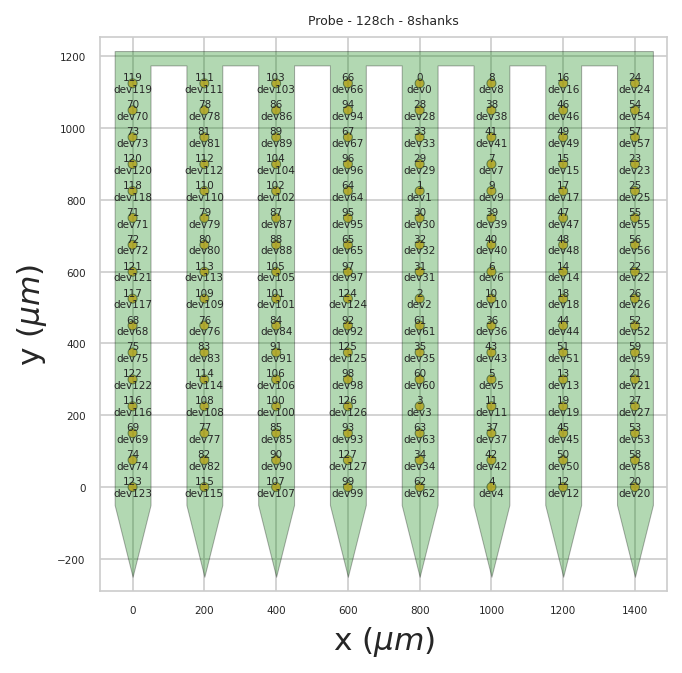

In [17]:
probe = rec.get_probe()
plot_probe(probe, with_channel_index=True, with_device_index=True)

In [18]:
sorting

NpzFolderSorting: 172 units - 1 segments - 20.0kHz

In [19]:
max_chids = spost.get_template_extremum_channel(we, peak_sign='both')
layers = []
for unit_id in sorting.get_unit_ids():
    chid = int(max_chids[unit_id])
    layer = contact_layers[chid]
    layers.append(layer)
sorting.set_property('layer', layers)

print(sorting.get_property('layer'))

['5A' '5A' '5B' '5A' '5A' '5A' '5A' '5B' '5A' '5A' '5A' '4' '5A' '5A' '5A'
 '5A' '5A' '5A' '5A' '5A' '5A' '5A' '4' '5A' '4' '5A' '5A' '5A' '4' '4'
 '4' '4' '4' '5A' '2/3' '4' '4' '5A' '5A' '4' '4' '5B' '5B' '5B' '4' '5A'
 '4' '5A' '5B' '5B' '4' '4' '4' '5A' '4' '5B' '2/3' '5A' '5B' '4' '5B'
 '5B' '2/3' '4' '5B' '2/3' '4' '4' '4' '5A' '5B' '2/3' '5B' '2/3' '5A' '4'
 '4' '5B' '5B' '4' '4' '2/3' '4' '2/3' '5B' '5B' '5B' '4' '2/3' '5B' '2/3'
 '2/3' '4' '5A' '5B' '5A' '4' '2/3' '4' '5B' '5A' '5B' '4' '5B' '5B' '4'
 '5A' '5B' '2/3' '2/3' '5B' '2/3' '2/3' '5B' '5B' '5B' '4' '5B' '2/3' '5A'
 '5B' '5B' '5A' '5A' '5A' '5A' '2/3' '5B' '5B' '5B' '5B' '2/3' '2/3' '5B'
 '5B' '2/3' '5B' '2/3' '2/3' '5A' '5A' '5B' '5B' '2/3' '5B' '5A' '5B'
 '2/3' '5B' '5A' '5B' '5A' '5B' '5B' '5B' '5A' '5A' '5A' '5B' '5A' '5B'
 '5A' '5A' '5B' '5B' '4' '2/3' '4' '5B' '5A' '5A' '4']


In [20]:
max_chids

{0: '68',
 1: '92',
 2: '60',
 3: '10',
 4: '6',
 5: '61',
 6: '109',
 7: '21',
 8: '51',
 9: '97',
 10: '59',
 11: '40',
 12: '76',
 13: '26',
 14: '36',
 15: '2',
 16: '84',
 17: '91',
 18: '43',
 19: '117',
 20: '76',
 21: '52',
 22: '56',
 23: '51',
 24: '55',
 25: '44',
 26: '101',
 27: '125',
 28: '88',
 29: '48',
 30: '30',
 31: '17',
 32: '32',
 33: '75',
 34: '57',
 35: '72',
 36: '110',
 37: '124',
 38: '14',
 39: '47',
 40: '64',
 41: '27',
 42: '5',
 43: '13',
 44: '118',
 45: '83',
 46: '65',
 47: '22',
 48: '98',
 49: '99',
 50: '9',
 51: '80',
 52: '1',
 53: '109',
 54: '25',
 55: '11',
 56: '38',
 57: '35',
 58: '58',
 59: '7',
 60: '106',
 61: '53',
 62: '8',
 63: '102',
 64: '19',
 65: '66',
 66: '96',
 67: '95',
 68: '39',
 69: '59',
 70: '53',
 71: '8',
 72: '3',
 73: '54',
 74: '31',
 75: '71',
 76: '95',
 77: '122',
 78: '114',
 79: '120',
 80: '112',
 81: '24',
 82: '15',
 83: '94',
 84: '37',
 85: '126',
 86: '50',
 87: '23',
 88: '70',
 89: '116',
 90: '73',
 9

(array([54.,  0.,  0., 54.,  0.,  0., 38.,  0.,  0., 26.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

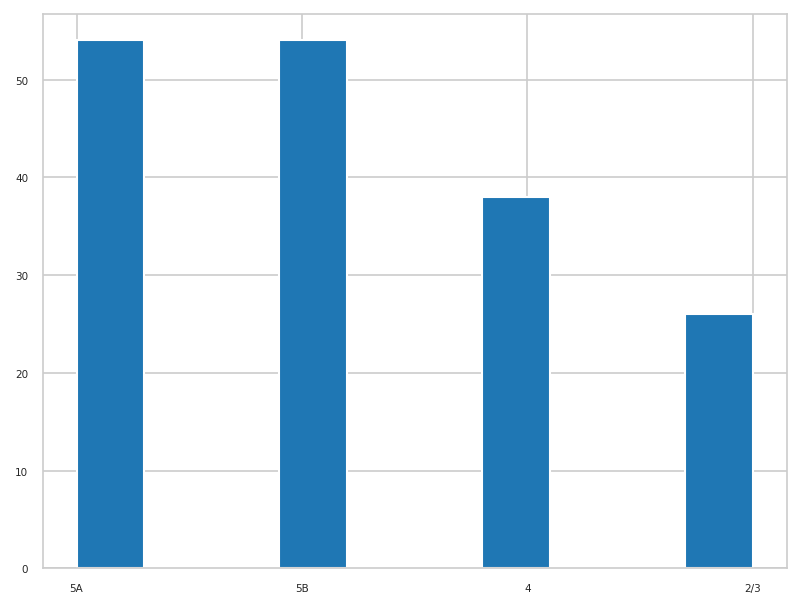

In [21]:
plt.hist(sorting.get_property('layer'))

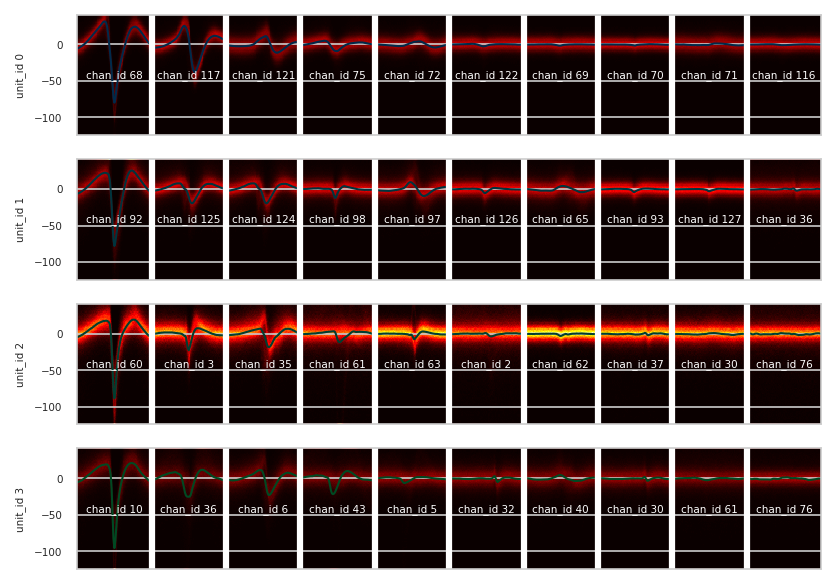

In [22]:
selected_unit_ids = sorting.unit_ids[:4]
sw.plot_unit_waveforms_density_map(we, unit_ids=selected_unit_ids, max_channels=10)

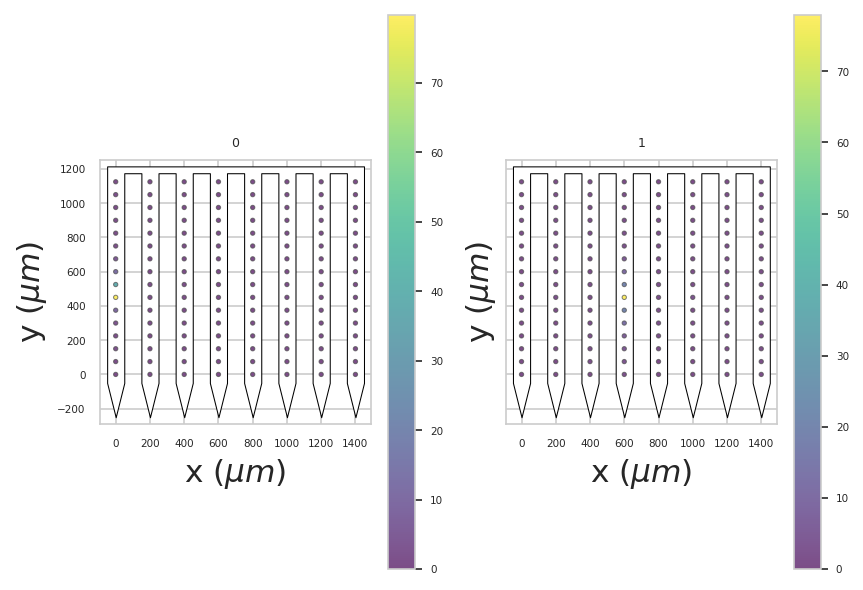

In [23]:
unit_ids = sorting.unit_ids[:2]
sw.plot_unit_probe_map(we, unit_ids=unit_ids)

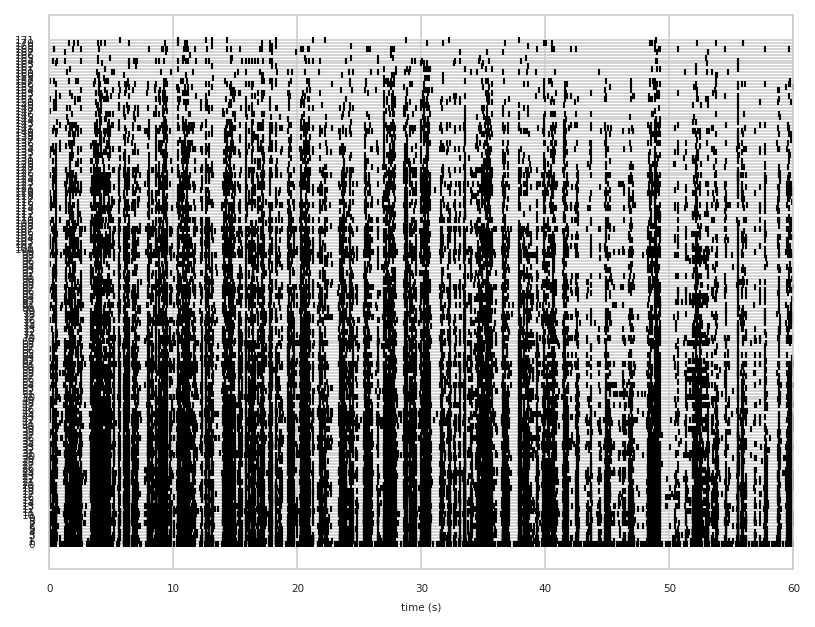

In [24]:
sw.plot_rasters(sorting, time_range=(0, 60))

68


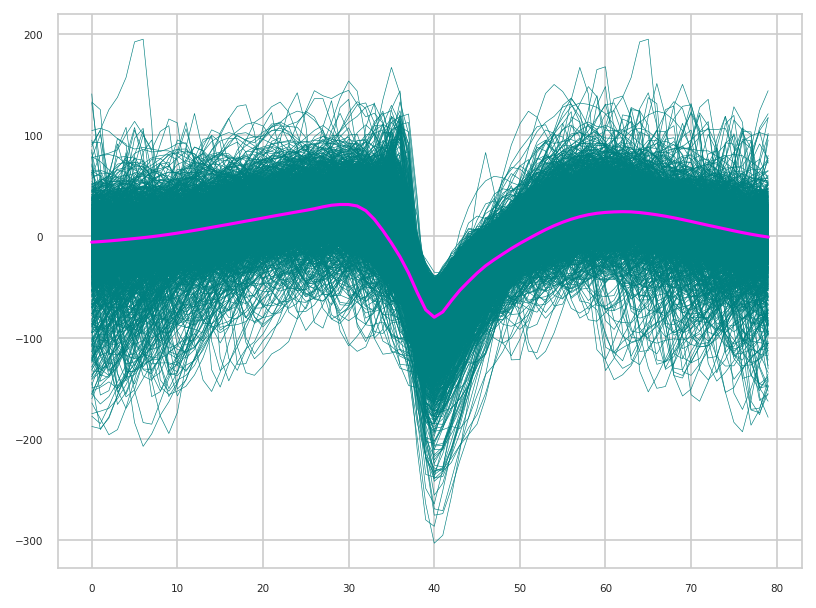

92


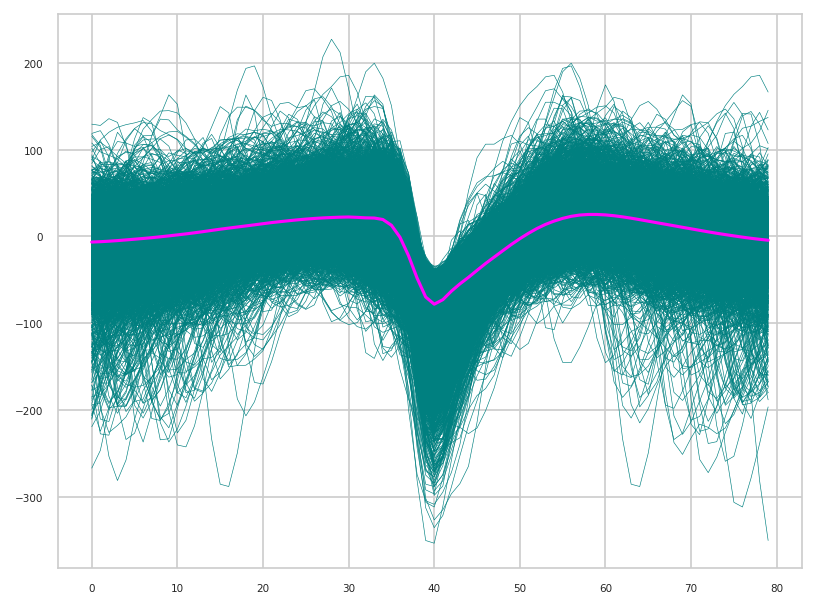

60


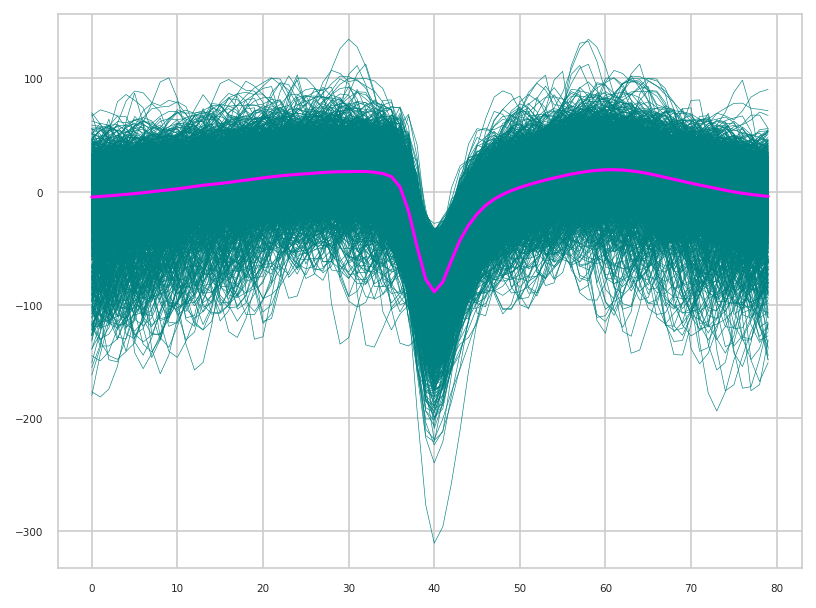

10


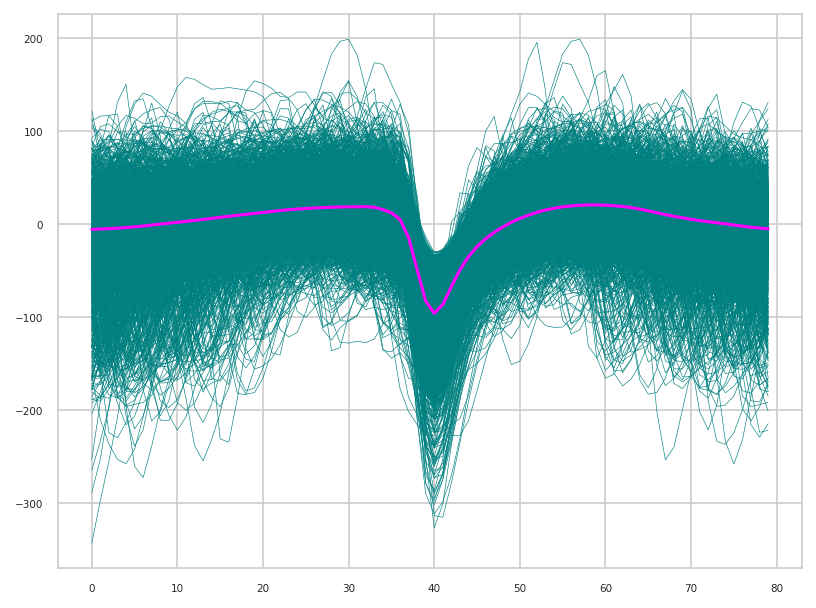

6


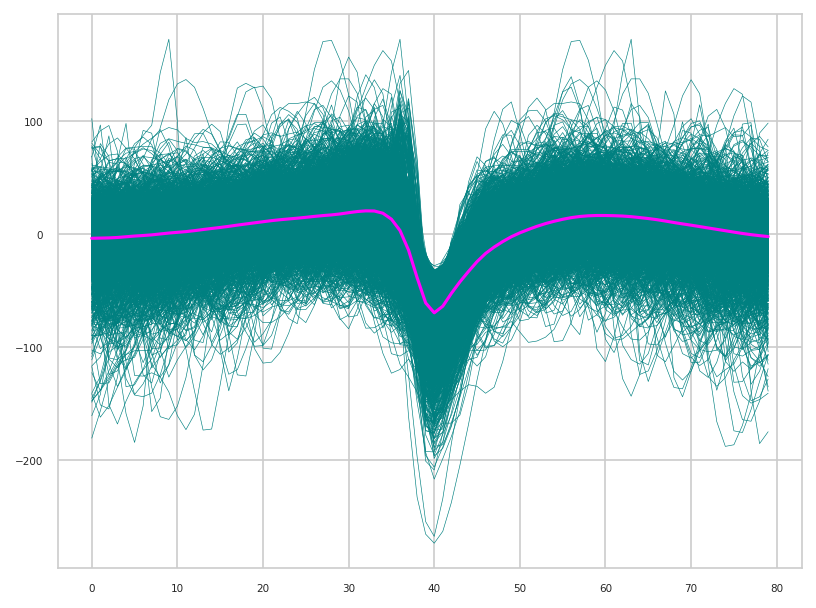

61


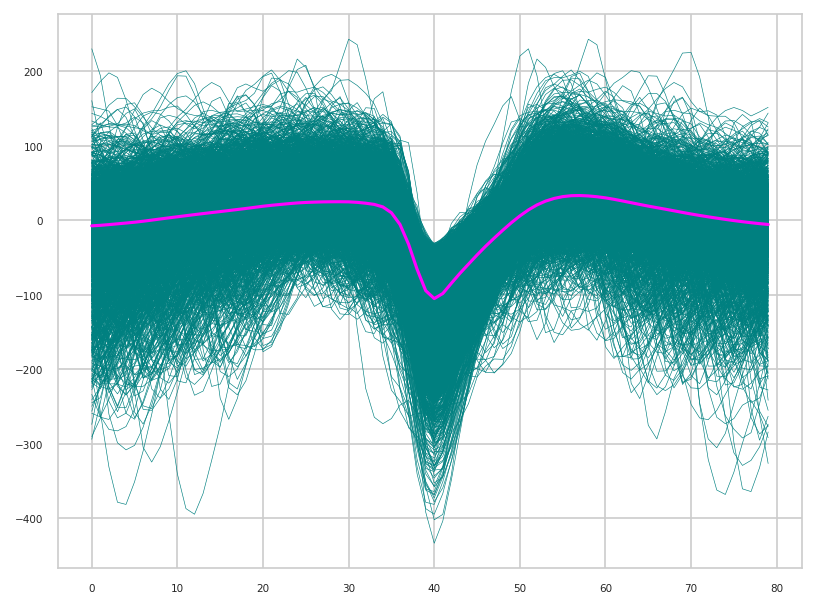

109


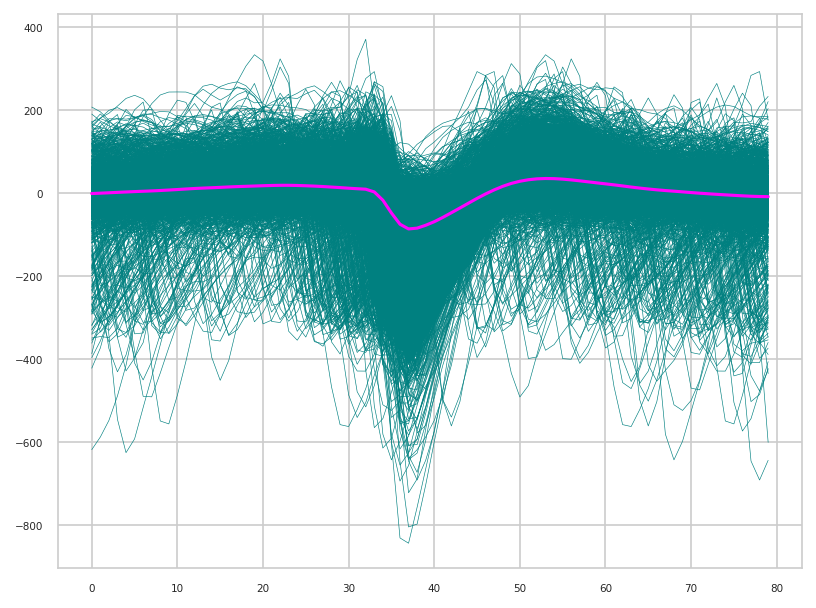

21


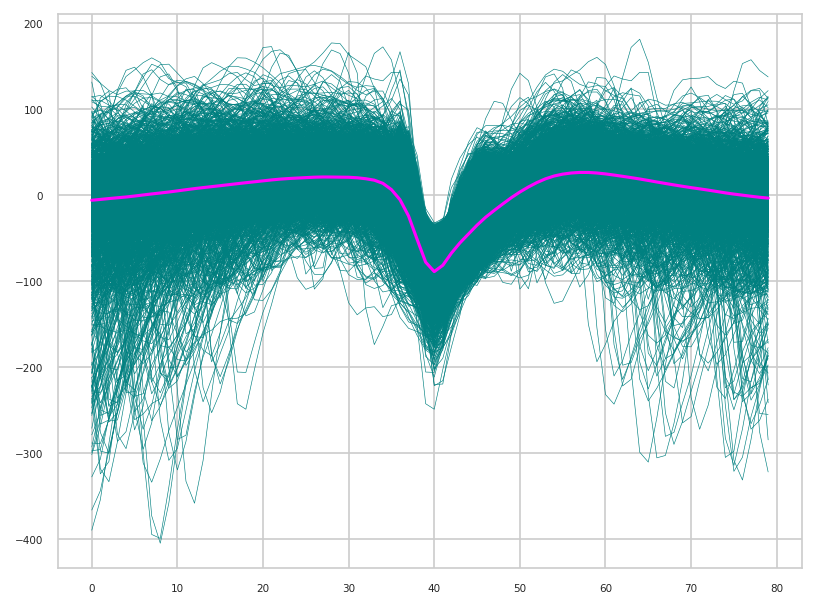

51


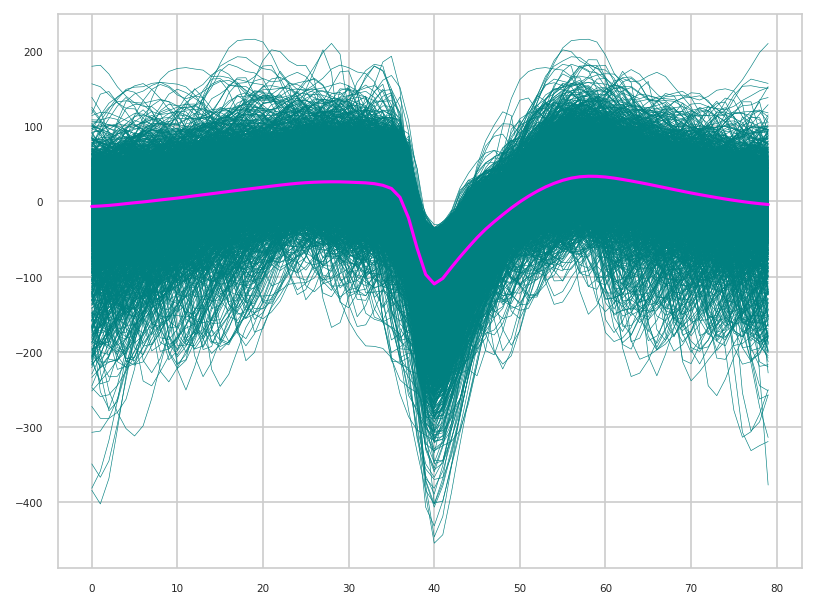

97


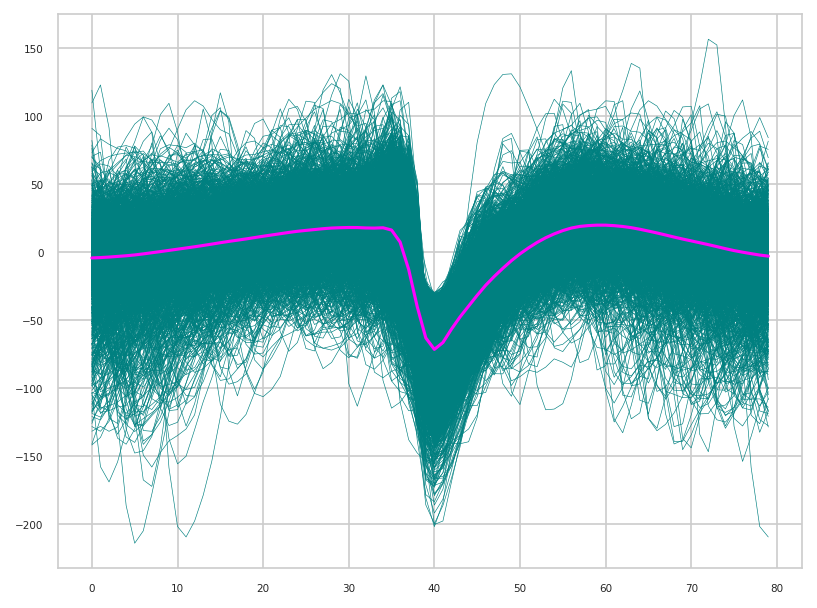

In [25]:
colors = ['Olive', 'Teal', 'Fuchsia']

for i, unit_id in enumerate(sorting.unit_ids[:10]):
    wf = we.get_waveforms(unit_id)
    color = colors[1]
    
    idx = int(max_chids[unit_id])
    print(idx)
    plt.plot(wf[:, :, idx].T, color=color, lw=0.3)
    tmp = we.get_template(unit_id)
    plt.plot(tmp[:,idx], color = colors[2])
    plt.show()
  

In [26]:
trains = sorting.get_all_spike_trains()

In [27]:
sorting.to_spike_vector()

array([(      25, 104, 0), (      33,  35, 0), (      52,  87, 0), ...,
       (11999906,   3, 0), (11999912, 100, 0), (11999921, 105, 0)],
      dtype=[('sample_ind', '<i8'), ('unit_ind', '<i8'), ('segment_ind', '<i8')])

In [28]:
sorting.get_unit_ids()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171])

In [29]:
template_metrics = spost.compute_template_metrics(we)

In [30]:
sorter = 'kilosort3'
sort_folder =  out + str(sorter) + '_spikes_test'
we_folder = out + str(sorter) + '_wfs_test'
print(sorter)
sorting =  si.load_extractor(sort_folder)
rec = si.load_extractor(outrec)
we = si.extract_waveforms(rec, sorting, we_folder,
                      load_if_exists=False, overwrite=True,
                      ms_before=2, ms_after=2, max_spikes_per_unit=None, verbose = True, n_jobs = 10, total_memory = '60G')

kilosort3
Setting 'return_scaled' to False
extract waveforms memmap with n_jobs = 10 and chunk_size = 11718750


# Actual multiple sorters analysis

herdingspikes
368184 172


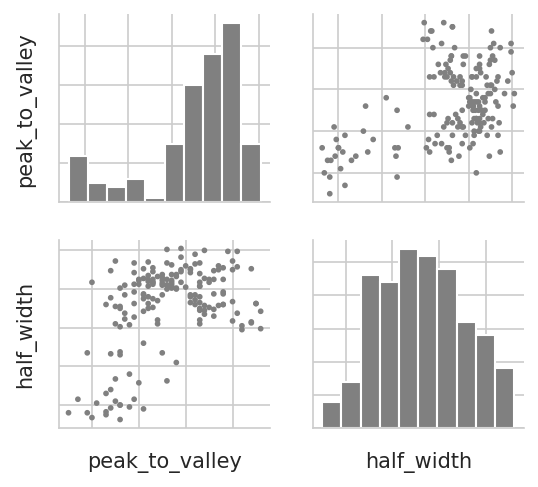

kilosort3
372264 157


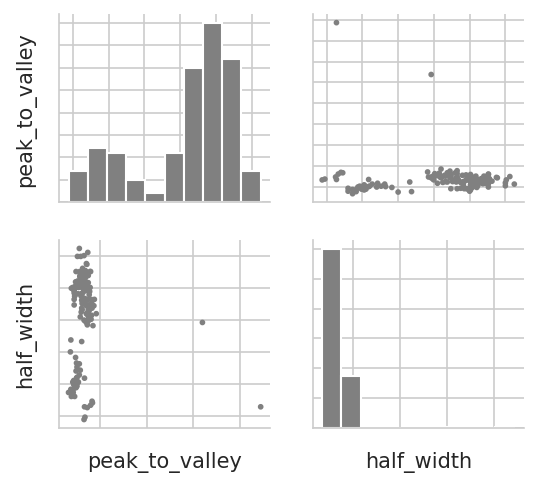

In [31]:
# celltype clustering with template metrics
np.seterr(all="ignore")
for sorter in sorters:
    sort_folder =  out + str(sorter) + '_spikes_test'
    we_folder = out + str(sorter) + '_wfs_test'
    print(sorter)
    sorting =  si.load_extractor(sort_folder)
    nspikes = sum(sorting.get_total_num_spikes().values())
    nunits = len(sorting.get_unit_ids())
    print(nspikes, nunits)
    we = WaveformExtractor.load_from_folder(we_folder)
    template_metrics = spost.compute_template_metrics(we)
    sw.plot_template_metrics(we, include_metrics=["peak_to_valley", "half_width"])
    plt.show()

In [32]:
sorters_fr_results = {}
qmetrics = {}
for sorter in sorters:
    sort_folder =  out + str(sorter) + '_spikes_test'
    we_folder = out + str(sorter) + '_wfs_test'
    print(sorter)
    sorting = si.load_extractor(sort_folder)
    print(sorting)
    try:
        we = WaveformExtractor.load_from_folder(we_folder)
        print('Computing metrics')
        qm = sqm.compute_quality_metrics(we, progress_bar=True)
        print('Done with metrics')
    except: # if the loading of waveforms fails, compute them
        rec = si.load_extractor(outrec)
        print('Extracting waveforms')
        we = si.extract_waveforms(rec, sorting, we_folder,
                          load_if_exists=False, overwrite=True,
                          ms_before=2, ms_after=2, max_spikes_per_unit=None, verbose = True, n_jobs = 10, total_memory = '60G')
        qm = sqm.compute_quality_metrics(we)
    print('Computing frs')
    qm,rates_per_layer = firingrates_from_sorting(sorting,we,qm, contact_layers)
    print('Done with', sorter)
    qmetrics[sorter] = qm
    sorters_fr_results[sorter] = rates_per_layer

herdingspikes
NpzFolderSorting: 172 units - 1 segments - 20.0kHz
Computing metrics


/gpfs/bbp.cscs.ch/project/proj68/home/laquitaine/spike-sorting/env/lib/python3.9/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:404: UserWarning: Amplitude PDF does not have a unique minimum! More spikes might be required for a correct amplitude_cutoff computation!
  warnings.warn("Amplitude PDF does not have a unique minimum! More spikes might be required for a correct "


Done with metrics
Computing frs
Done with herdingspikes
kilosort3
NpzFolderSorting: 157 units - 1 segments - 20.0kHz
Computing metrics


/gpfs/bbp.cscs.ch/project/proj68/home/laquitaine/spike-sorting/env/lib/python3.9/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:404: UserWarning: Amplitude PDF does not have a unique minimum! More spikes might be required for a correct amplitude_cutoff computation!
  warnings.warn("Amplitude PDF does not have a unique minimum! More spikes might be required for a correct "


Done with metrics
Computing frs
Done with kilosort3


In [33]:
save_qm_fr_results(out,sorters_fr_results, qmetrics)

# figures

In [34]:
sorters_fr_results, qmetrics = load_qm_fr_results(out, sorters)

In [35]:
pack_fr = pd.concat(sorters_fr_results).reset_index(names = ['Sorter', 'Layer'])

In [36]:
sorters_fr_results

{'herdingspikes':            FR  Units  Spikes
 2/3  1.968910     26   30715
 4    3.935219     38   89723
 5A   5.521451     54  178895
 5B   2.125031     54   68851,
 'kilosort3':            FR  Units  Spikes
 2/3  5.158000     10   30948
 4    7.493506     29  130387
 5A   3.337886     67  134183
 5B   2.508039     51   76746}

In [37]:
pack_fr

Sorter Layer        FR  Units  Spikes
0  herdingspikes   2/3  1.968910     26   30715
1  herdingspikes     4  3.935219     38   89723
2  herdingspikes    5A  5.521451     54  178895
3  herdingspikes    5B  2.125031     54   68851
4      kilosort3   2/3  5.158000     10   30948
5      kilosort3     4  7.493506     29  130387
6      kilosort3    5A  3.337886     67  134183
7      kilosort3    5B  2.508039     51   76746

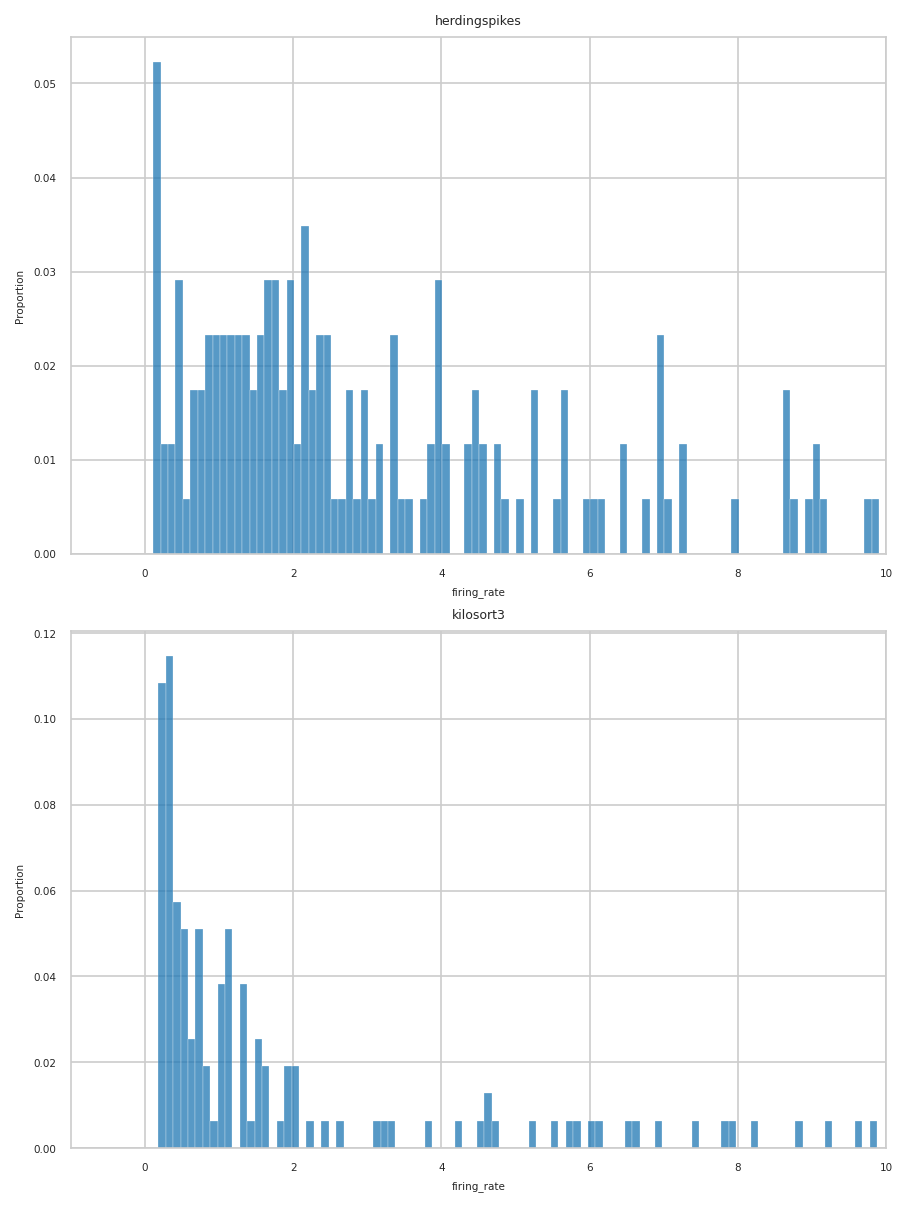

In [38]:
fig, ax = plt.subplots(len(qmetrics),1, figsize = (6,8))
for i, (sorter,qm) in enumerate(qmetrics.items()):
    sns.histplot(qm['firing_rate'], binwidth = 0.1, ax = ax[i], stat = 'proportion')
    ax[i].set_title(sorter)
    ax[i].set_xlim([-1,10])
plt.tight_layout()

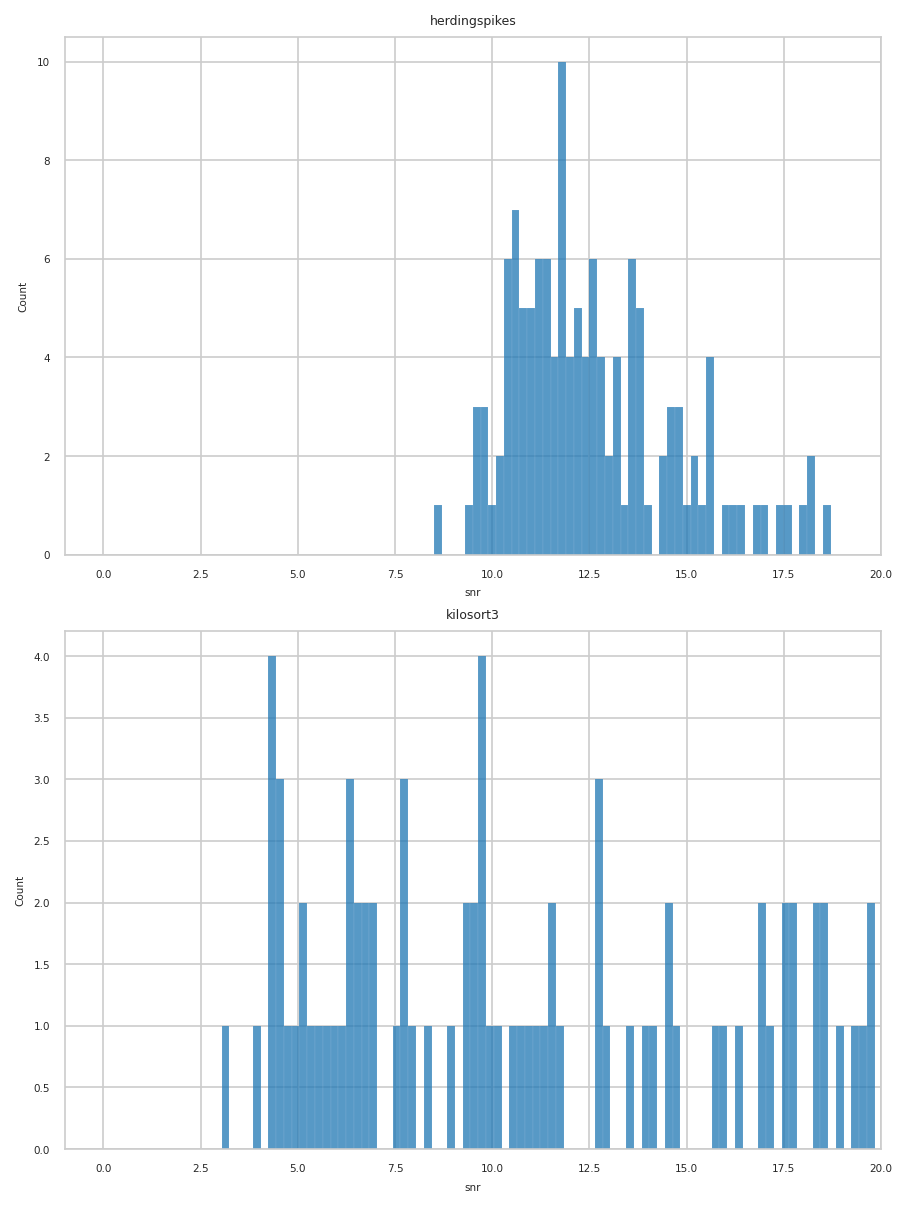

In [39]:
fig, ax = plt.subplots(len(qmetrics),1, figsize = (6,8))
for i, (sorter,qm) in enumerate(qmetrics.items()):
    sns.histplot(qm['snr'], binwidth = 0.2, ax = ax[i], stat = 'count')
    ax[i].set_title(sorter)
    ax[i].set_xlim([-1,20])
plt.tight_layout()

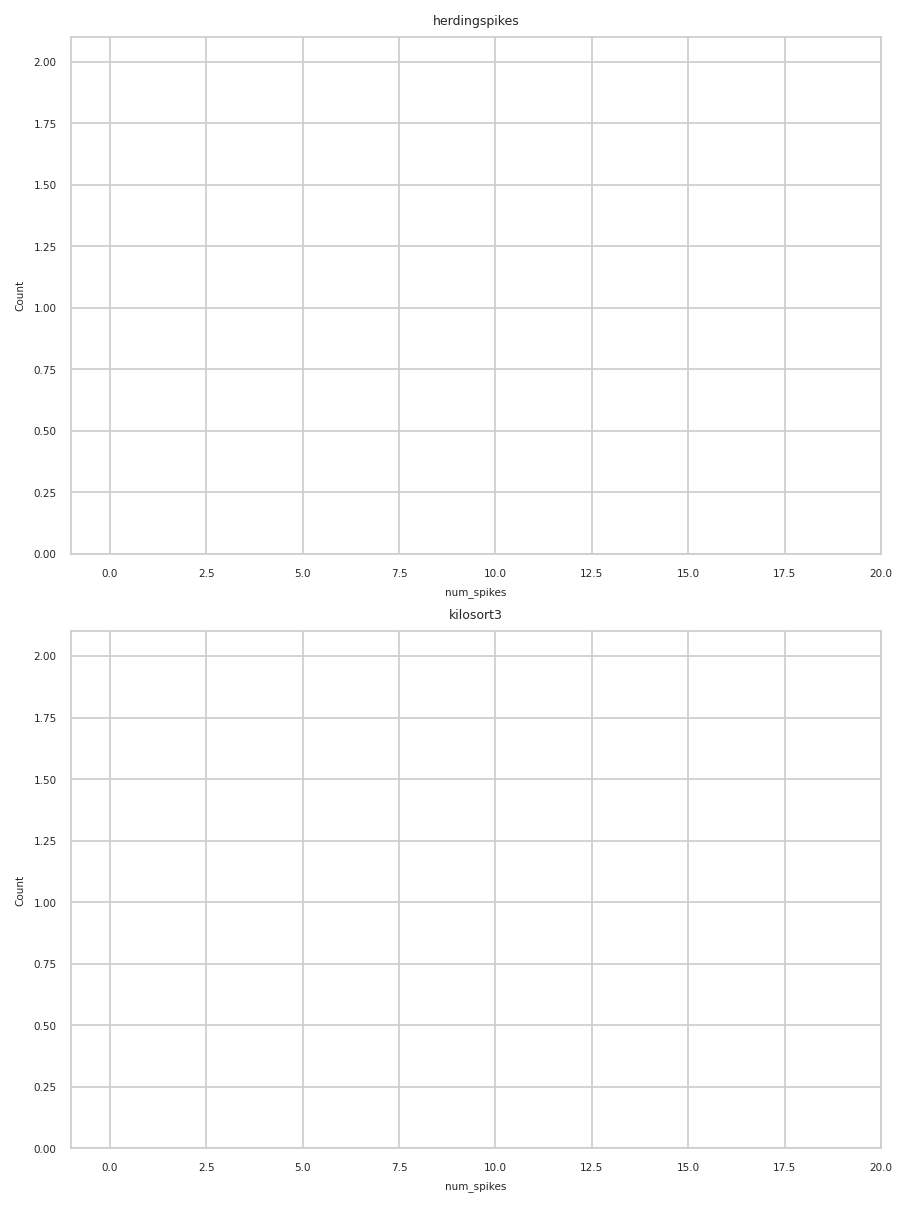

In [40]:
fig, ax = plt.subplots(len(qmetrics),1, figsize = (6,8))
for i, (sorter,qm) in enumerate(qmetrics.items()):
    sns.histplot(qm['num_spikes'], binwidth = 0.2, ax = ax[i], stat = 'count')
    ax[i].set_title(sorter)
    ax[i].set_xlim([-1,20])
plt.tight_layout()

In [94]:
qmetrics['hdsort']

KeyError: 'hdsort'

/tmp/ipykernel_240608/97041986.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pack_mean = pack_fr.groupby('Layer').mean().reset_index()


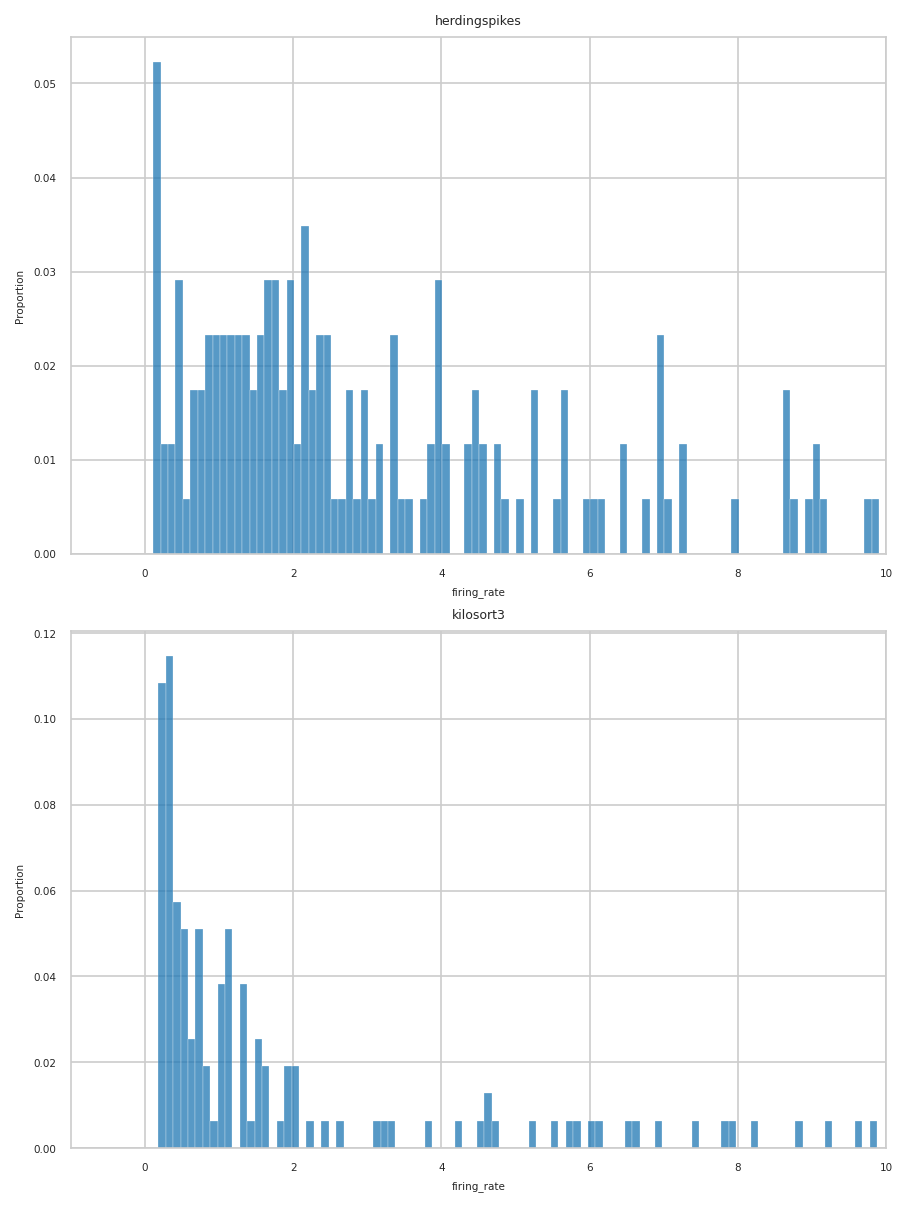

In [42]:

fig, ax = plt.subplots(len(qmetrics),1, figsize = (6,8))
for i, (sorter,qm) in enumerate(qmetrics.items()):
    sns.histplot(qm['firing_rate'], binwidth = 0.1, ax = ax[i], stat = 'proportion')
    ax[i].set_title(sorter)
    ax[i].set_xlim([-1,10])
plt.tight_layout()



pack_mean = pack_fr.groupby('Layer').mean().reset_index()
pack_mean['Sorter'] = np.tile('Mean', len(pack_mean))
pack_fr = pd.concat([pack_fr, pack_mean], axis = 0)

In [43]:
pack_fr

Sorter Layer        FR  Units    Spikes
0  herdingspikes   2/3  1.968910   26.0   30715.0
1  herdingspikes     4  3.935219   38.0   89723.0
2  herdingspikes    5A  5.521451   54.0  178895.0
3  herdingspikes    5B  2.125031   54.0   68851.0
4      kilosort3   2/3  5.158000   10.0   30948.0
5      kilosort3     4  7.493506   29.0  130387.0
6      kilosort3    5A  3.337886   67.0  134183.0
7      kilosort3    5B  2.508039   51.0   76746.0
0           Mean   2/3  3.563455   18.0   30831.5
1           Mean     4  5.714363   33.5  110055.0
2           Mean    5A  4.429668   60.5  156539.0
3           Mean    5B  2.316535   52.5   72798.5

/tmp/ipykernel_240608/1048687609.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.scatterplot(data = pack_fr.groupby('Sorter').sum(), x = 'Spikes', y = 'Units', hue = 'Sorter')


(0.0, 1800.0)

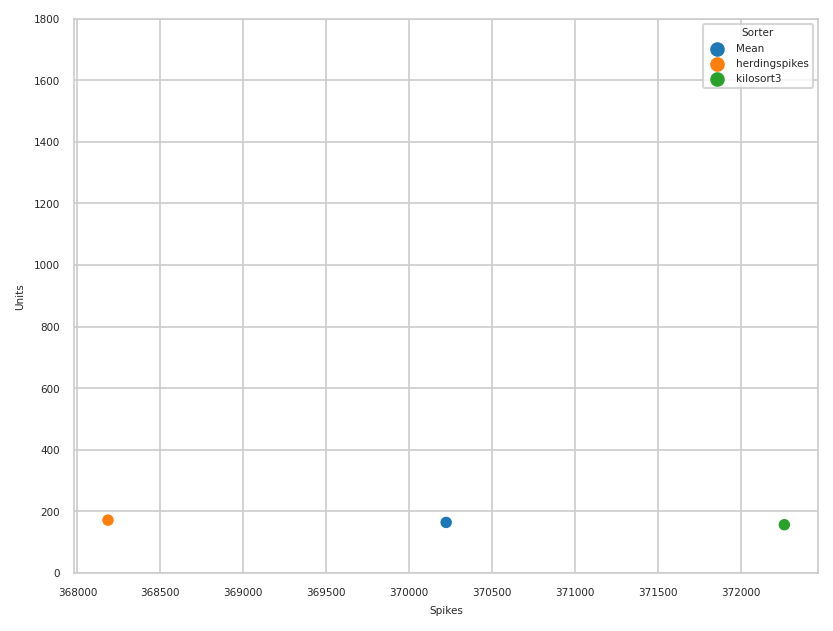

In [44]:
sns.scatterplot(data = pack_fr.groupby('Sorter').sum(), x = 'Spikes', y = 'Units', hue = 'Sorter')
plt.ylim([0,1800])

In [45]:
mean_fr = pd.concat([pack_fr.groupby('Sorter').mean()['FR'] , pack_fr.groupby('Sorter').sum()['Units']], axis = 1)

/tmp/ipykernel_240608/2385311823.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_fr = pd.concat([pack_fr.groupby('Sorter').mean()['FR'] , pack_fr.groupby('Sorter').sum()['Units']], axis = 1)
/tmp/ipykernel_240608/2385311823.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_fr = pd.concat([pack_fr.groupby('Sorter').mean()['FR'] , pack_fr.groupby('Sorter').sum()['Units']], axis = 1)


(0.0, 1800.0)

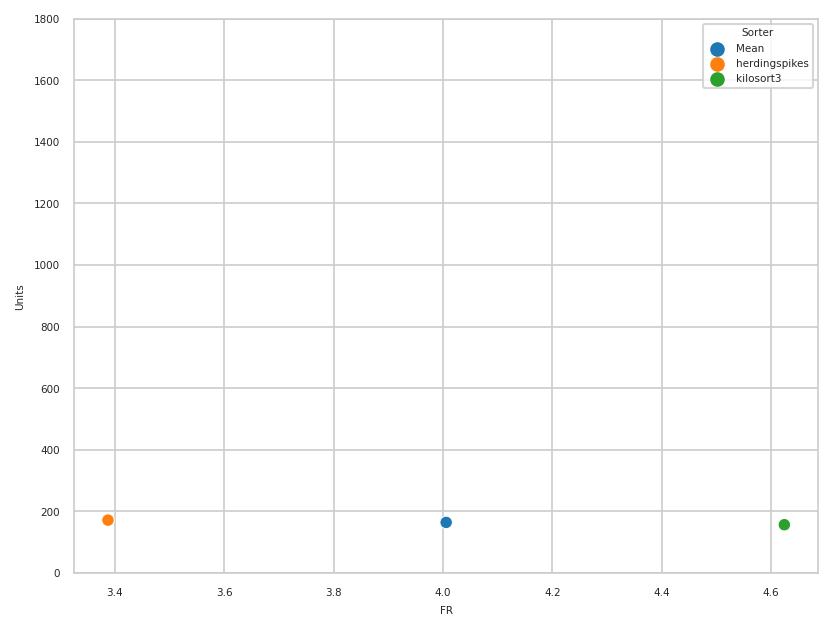

In [46]:
sns.scatterplot(mean_fr, x = 'FR', y = 'Units', hue = 'Sorter')
plt.ylim([0,1800])

In [47]:
pack_fr.loc[pack_fr['Sorter'] == 'Mean']

Sorter Layer        FR  Units    Spikes
0   Mean   2/3  3.563455   18.0   30831.5
1   Mean     4  5.714363   33.5  110055.0
2   Mean    5A  4.429668   60.5  156539.0
3   Mean    5B  2.316535   52.5   72798.5

<AxesSubplot: xlabel='Layer', ylabel='FR'>

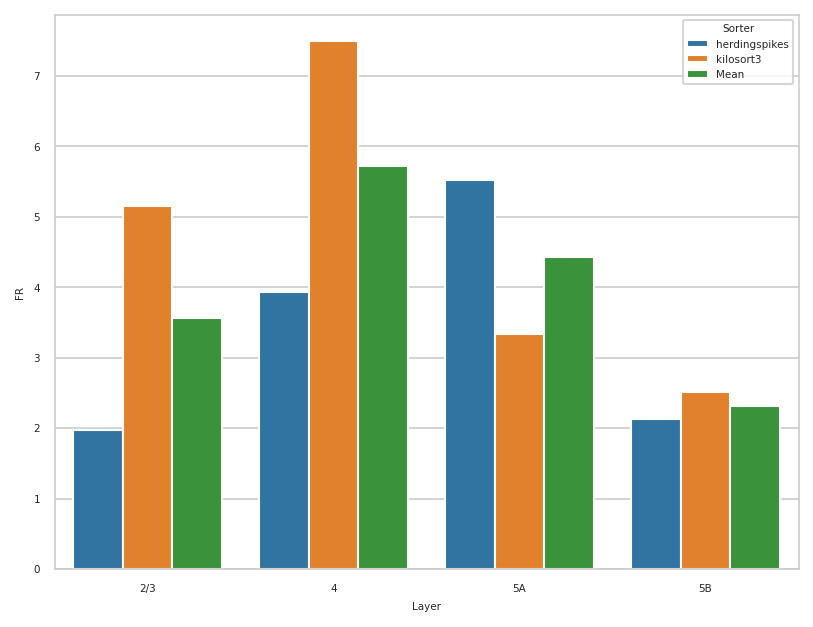

In [48]:
sns.barplot(data = pack_fr, x = 'Layer', y = 'FR', hue = 'Sorter')

<AxesSubplot: xlabel='Layer', ylabel='Units'>

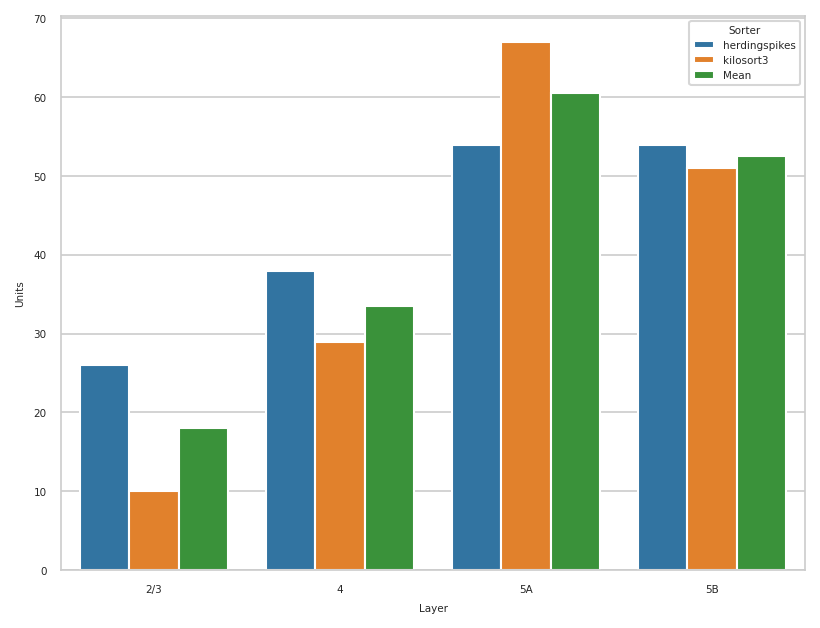

In [49]:
sns.barplot(data = pack_fr, x = 'Layer', y = 'Units', hue = 'Sorter')

<AxesSubplot: xlabel='Layer', ylabel='Spikes'>

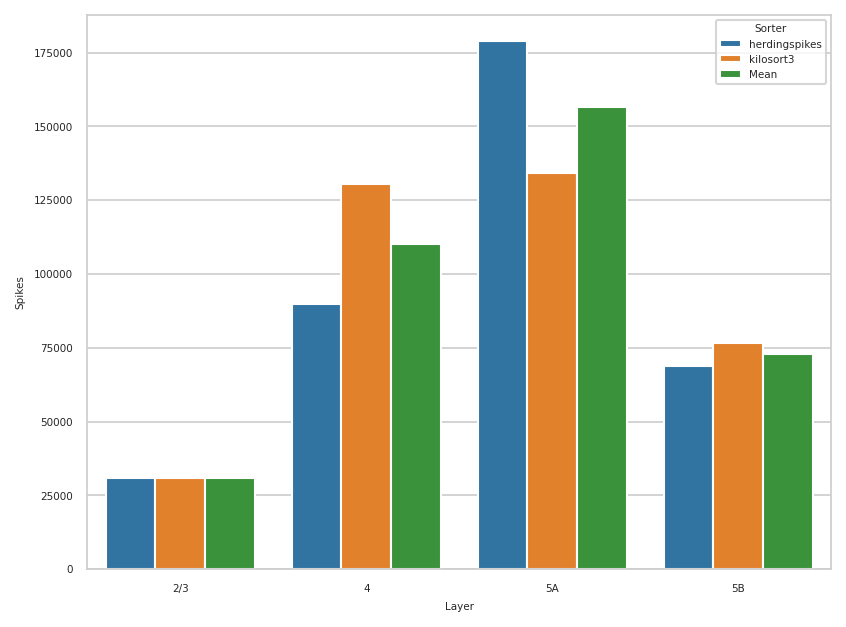

In [50]:
sns.barplot(data = pack_fr, x = 'Layer', y = 'Spikes', hue = 'Sorter')

<AxesSubplot: xlabel='FR', ylabel='Units'>

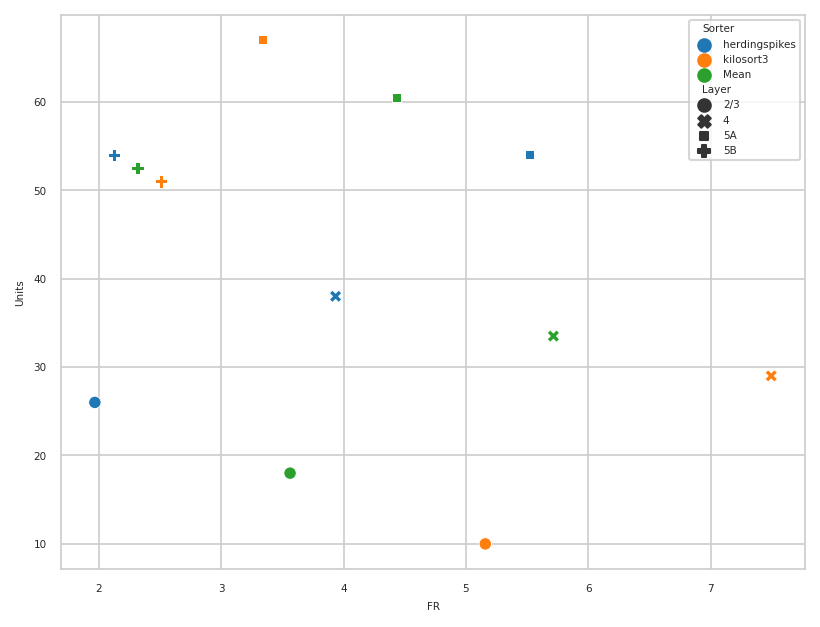

In [51]:
sns.scatterplot(data = pack_fr, x = 'FR', y = 'Units', hue = 'Sorter', style = 'Layer')

# Comparison

In [52]:
we_consensus_folder = out + '_consensus' + '_wfs_test'

In [53]:
sortings, sorters_to_compare = load_sortings_from_sorters(out,sorters)

Versions are not the same. This might lead to errors. Use  spikeinterface version 0.95.1
Loaded herdingspikes with units = 168
Versions are not the same. This might lead to errors. Use  spikeinterface version 0.95.1
Loaded kilosort3 with units = 183


In [56]:
# Long processing operations
mcmp = sc.compare_multiple_sorters(
    sorting_list=sortings,
    name_list=sorters_to_compare,
    verbose=True,
)
mcmp.save_to_folder(out + '_comparison_test')
agreement_sorting = mcmp.get_agreement_sorting(minimum_agreement_count=2)
agreement_sorting = agreement_sorting.save(folder= out + '_agreement_spikes_test')

Multicomaprison step 1: pairwise comparison
  Comparing: herdingspikes and kilosort3
Multicomparison step 2: make graph
Multicomaprison step 3: clean graph
Removed 0 duplicate nodes
Multicomparison step 4: extract agreement from graph


<class 'networkx.utils.decorators.argmap'> compilation 9:5: DeprecationWarning: write_gpickle is deprecated and will be removed in 3.0.Use ``pickle.dump(G, path, protocol)``


In [61]:
we_consensus = si.extract_waveforms(rec, agreement_sorting, we_consensus_folder,
                          load_if_exists=False, overwrite=True, verbose = True,
                          ms_before=2, ms_after=2., max_spikes_per_unit=None, n_jobs = 20, total_memory = '60G')
print(we_consensus)

Setting 'return_scaled' to False
extract waveforms memmap with n_jobs = 20 and chunk_size = 5859375
WaveformExtractor: 128 channels - 70 units - 1 segments
  before:40 after:40 n_per_units:None


<class 'networkx.utils.decorators.argmap'> compilation 14:5: DeprecationWarning: read_gpickle is deprecated and will be removed in 3.0.Use ``pickle.load(path)``


Versions are not the same. This might lead to errors. Use  spikeinterface version 0.95.1
NpzSortingExtractor: 70 units - 1 segments - 20.0kHz
  file_path: /gpfs/bbp.cscs.ch/data/scratch/proj68/imbeni/sorting/output/2_reyes/Exp26/S001E026F005_agreement_spikes/sorting_cached.npz


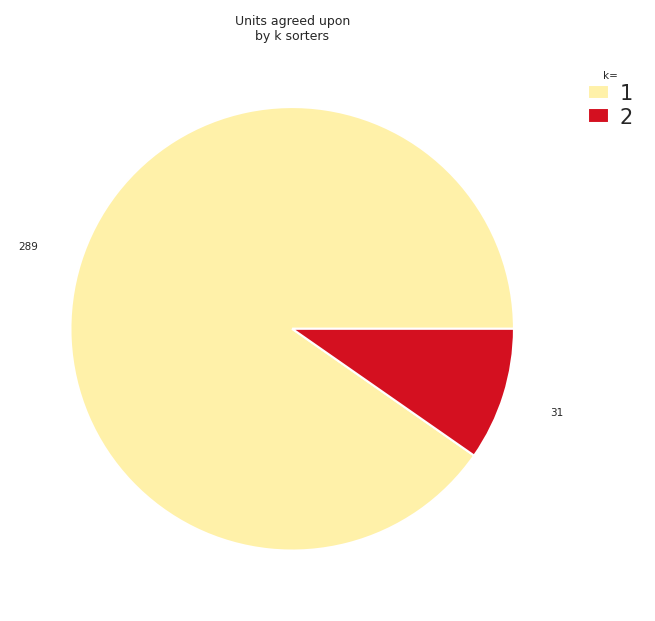

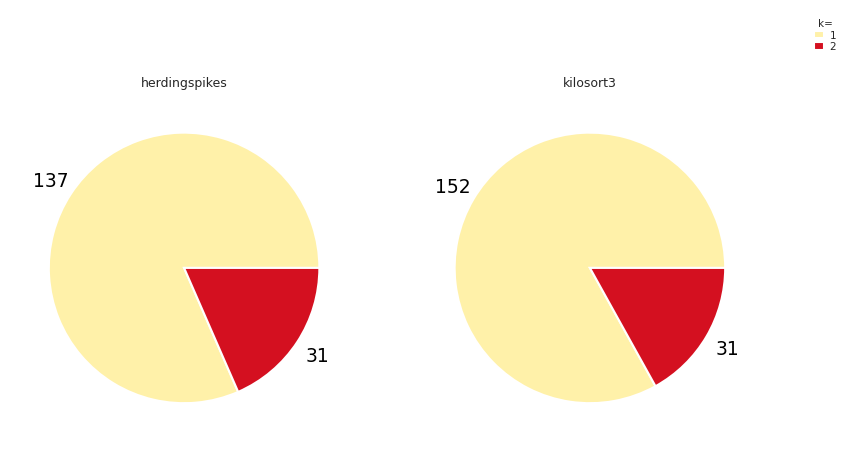

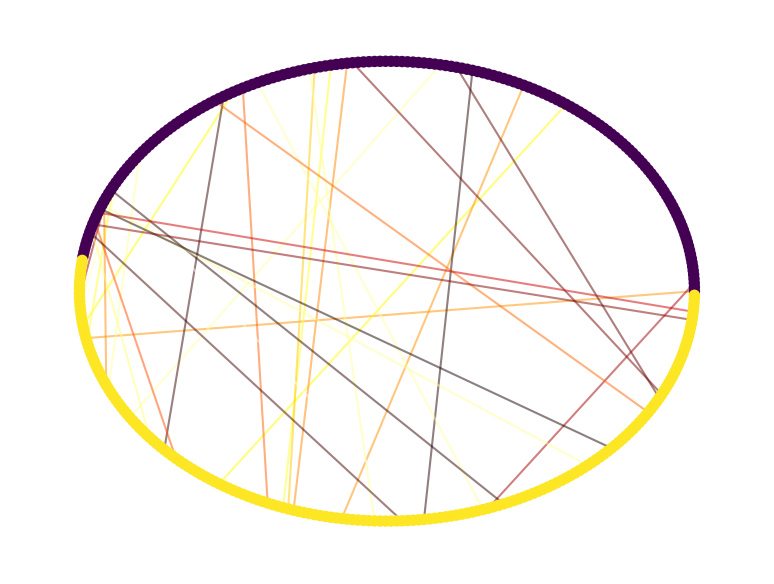

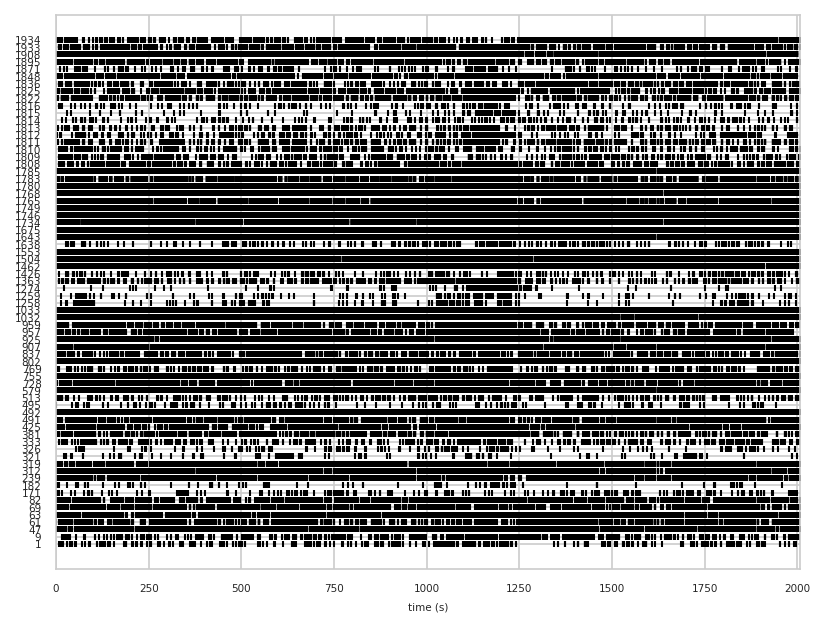

In [59]:
#Compare multiple sorters
mcmp = MultiSortingComparison.load_from_folder(out + '_comparison')

w = sw.plot_multicomp_agreement(mcmp)
w = sw.plot_multicomp_agreement_by_sorter(mcmp)
sw.plot_multicomp_graph(mcmp, draw_labels=False)
agreement_sorting = si.load_extractor( out + '_agreement_spikes')
print(agreement_sorting)
sw.plot_rasters(agreement_sorting)

In [60]:
we_consensus = WaveformExtractor.load_from_folder(we_consensus_folder)
pc = spost.compute_principal_components(we_consensus, load_if_exists=True,
                                     n_components=3, mode='by_channel_local')
print(pc)

WaveformPrincipalComponent: 128 channels - 1 segments
  mode:by_channel_local n_components:3


In [62]:
we = we_consensus
qm = sqm.compute_quality_metrics(we_consensus, n_jobs = 20)
qm,rates_per_layer = firingrates_from_sorting(agreement_sorting,we_consensus,qm,contact_layers)

/gpfs/bbp.cscs.ch/project/proj68/home/laquitaine/spike-sorting/env/lib/python3.9/site-packages/spikeinterface/qualitymetrics/misc_metrics.py:404: UserWarning: Amplitude PDF does not have a unique minimum! More spikes might be required for a correct amplitude_cutoff computation!
  warnings.warn("Amplitude PDF does not have a unique minimum! More spikes might be required for a correct "


In [63]:
qm

num_spikes  firing_rate  presence_ratio       snr  isi_violations_ratio  \
1            332     0.553333            0.59  0.431558              1.814487   
9            544     0.906667            0.58  0.134662              1.351644   
47          3121     5.201667            0.99  0.080765              0.184793   
61          1498     2.496667            0.84  0.104623              0.623885   
63          1585     2.641667            0.95  0.178255              0.238832   
...          ...          ...             ...       ...                   ...   
1871         224     0.373333            0.50  0.314960              0.000000   
1895        1428     2.380000            0.94  0.167963              0.098078   
1908        3690     6.150000            1.00  0.067869              0.558163   
1933        1276     2.126667            0.82  0.139016              0.000000   
1934        1182     1.970000            0.84  0.083627              1.002059   

      isi_violations_rate  isi_violations_count  amplitude_cutoff Layer  
1                0.001667                     1          0.000779    5A  
9                0.003333                     2          0.000476    5A  
47               0.015000                     9          0.000083    5A  
61               0.011667                     7          0.000173    5A  
63               0.005000                     3          0.000163    5A  
...                   ...                   ...               ...   ...  
1871             0.000000                     0          0.001155    5A  
1895             0.001667                     1          0.000181    5A  
1908             0.063333                    38          0.000070    5A  
1933             0.000000                     0          0.000203    5A  
1934             0.011667                     7          0.000219    5A  

[70 rows x 9 columns]

In [64]:
qm.dropna(inplace= True)

In [65]:
def plot_qm(qm):
    
    plot_params = { 'num_spikes' :          {'xlim' : 0},
                    'firing_rate':          {'xlim' : 7},
                    'presence_ratio':       {'xlim' : 1},
                    'snr':                  {'xlim' : 100},
                    'isi_violations_ratio': {'xlim' : 0},
                    'amplitude_cutoff':     {'xlim' : 0.5},
                    'isolation_distance' :  {'xlim' : 0},
                    'l_ratio' :             {'xlim' : 1},
                    'd_prime' :             {'xlim' : 10},
                    'Layer' :               {'xlim' : 0}
                  }
    fig, ax = plt.subplots(len(qm.columns)-4,1, figsize = (6,8))
    i = 0
    for col in qm:
        if col == 'isi_violations_rate' or col == 'isi_violations_count' or col == 'num_spikes' or col == 'Layer':
            continue
        print(col)
        
        data = qm[col]
        xlim = plot_params[col]['xlim'] 
        #params[col]['binwidth'] = binwidth
        
        if xlim != 0:
            ax[i].set_xlim(right = xlim)
            binwidth = xlim/50
        else:
            binwidth = np.ptp(data)/30
            
        sns.histplot(data, binwidth = binwidth , ax = ax[i], stat = 'proportion')
        #ax[i].set_title(col)
        i +=1

    plt.tight_layout()
    plt.show()

firing_rate
presence_ratio
snr
isi_violations_ratio
amplitude_cutoff


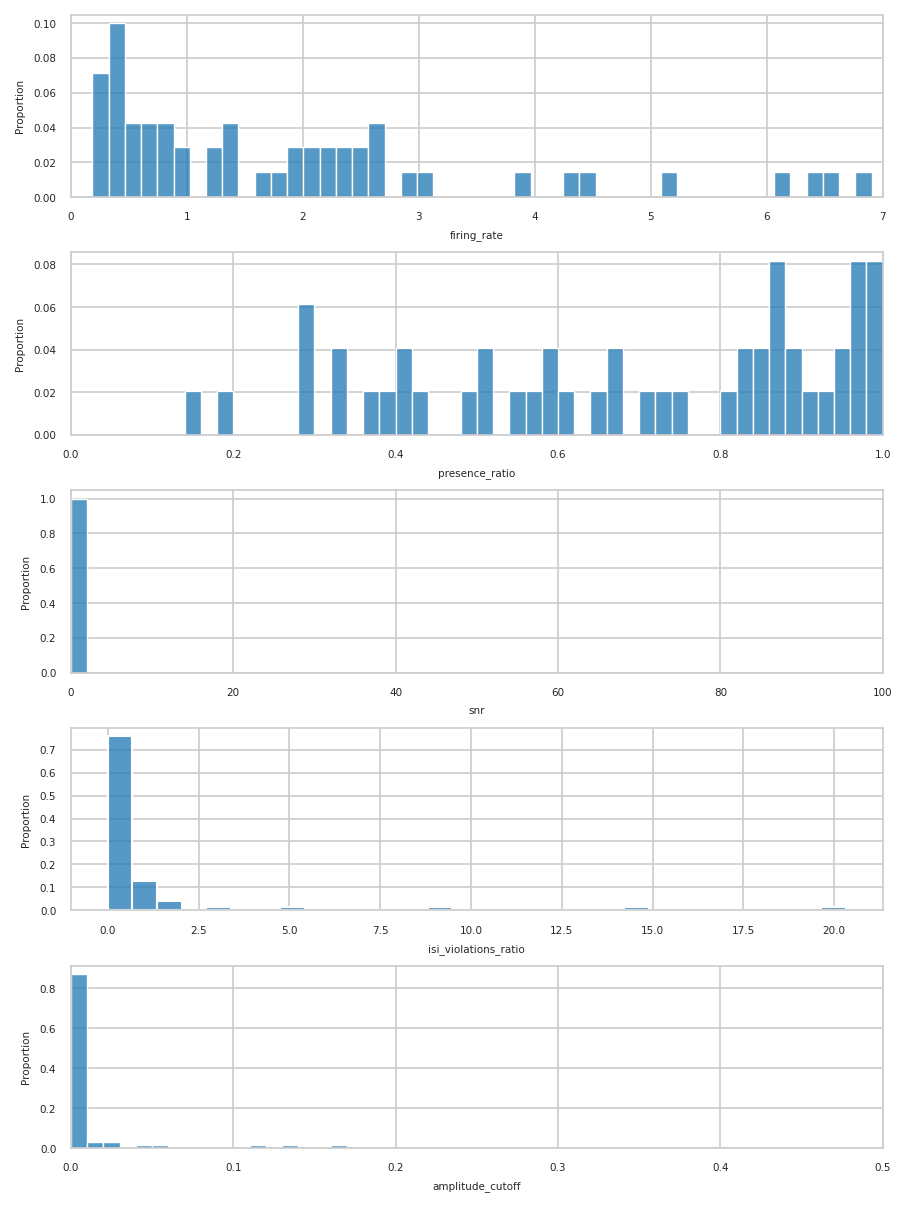

In [66]:
plot_qm(qm)

In [67]:
for i in template_metrics:
    print(i)

peak_to_valley
peak_trough_ratio
half_width
repolarization_slope
recovery_slope


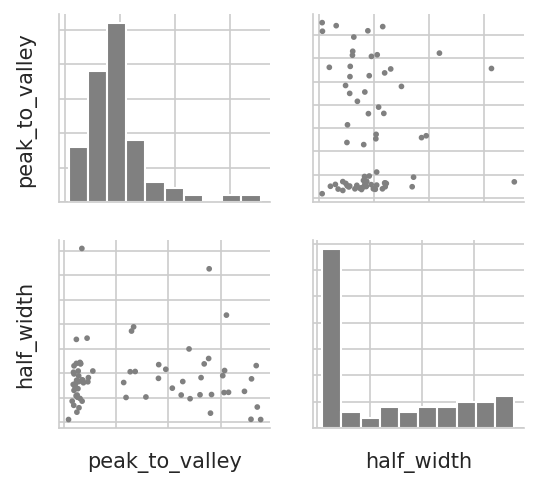

In [68]:
template_metrics = spost.compute_template_metrics(we)
sw.plot_template_metrics(we, include_metrics=["peak_to_valley", "half_width"])
plt.show()

<AxesSubplot: xlabel='peak_to_valley', ylabel='peak_trough_ratio'>

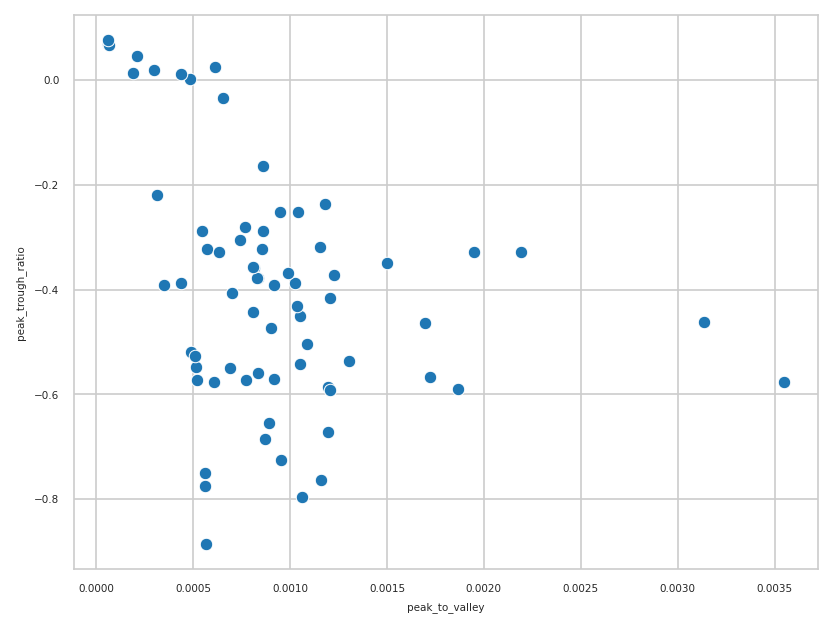

In [69]:
sns.scatterplot(template_metrics, x = "peak_to_valley", y = 'peak_trough_ratio')

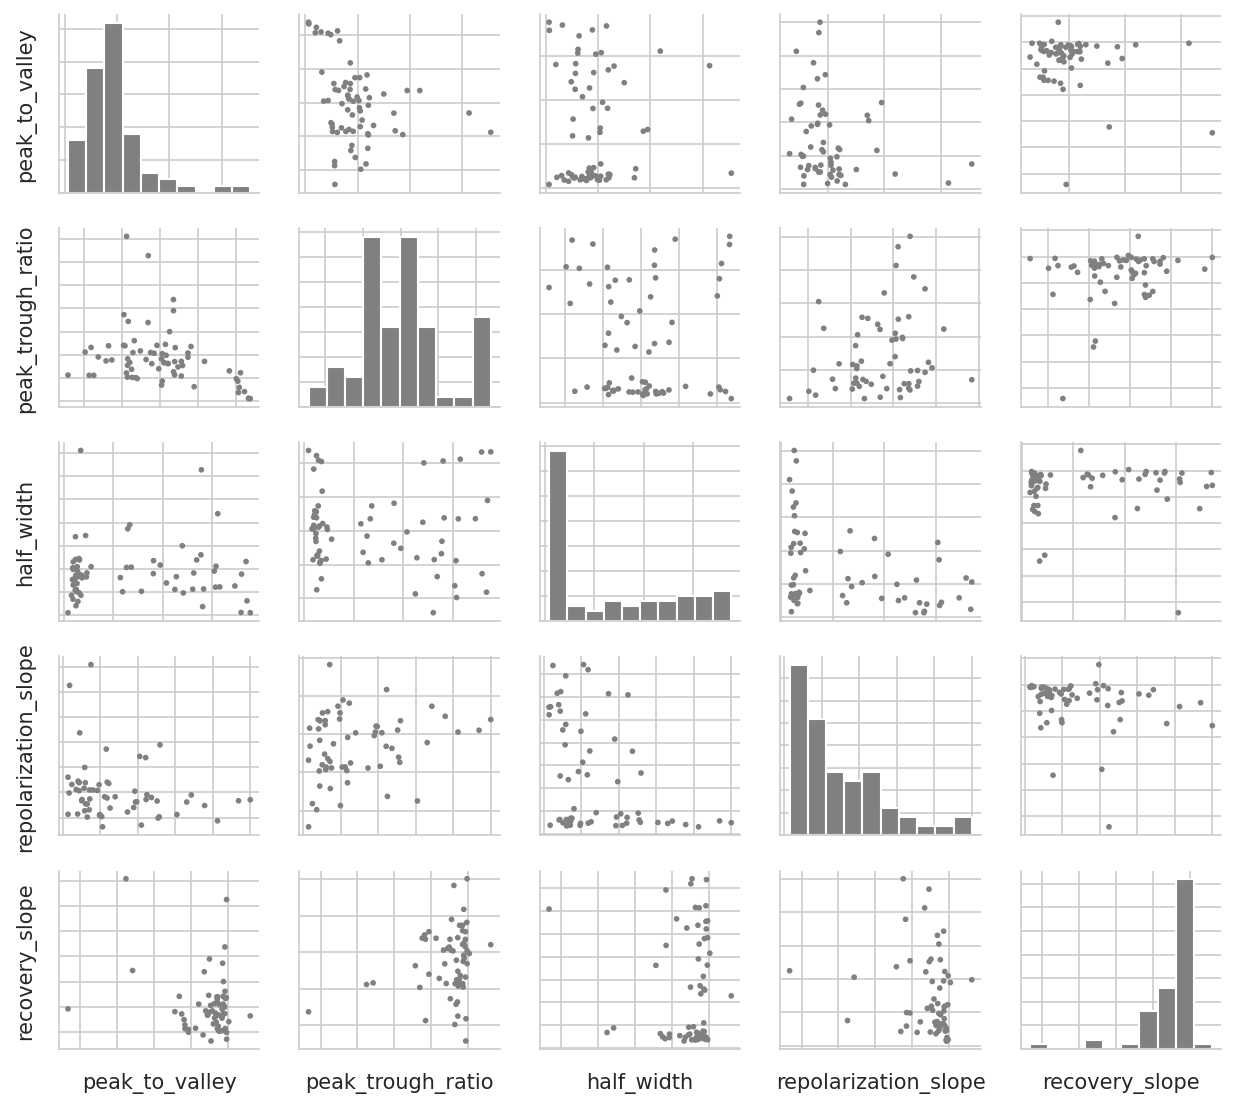

In [70]:
sw.plot_template_metrics(we, include_metrics=["peak_to_valley", "half_width", "peak_trough_ratio", "repolarization_slope", "recovery_slope"])

In [71]:
def normalize(df):
    df = df.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
    return df

In [73]:
template_metrics = normalize(template_metrics)

In [74]:
pca = PCA(n_components=2)
x = pca.fit_transform(template_metrics[["peak_to_valley", "half_width", "peak_trough_ratio"]])

In [75]:
x

array([[-0.26082892, -0.11388828],
       [ 0.50258775, -0.84203192],
       [-0.87415418, -0.75186231],
       [ 1.28066951,  1.02414076],
       [ 0.95290033,  1.83144433],
       [ 0.6398592 ,  1.05149104],
       [ 0.80496503, -0.84698059],
       [-0.87302738, -0.77414429],
       [ 0.56688346, -0.66155785],
       [ 1.3726142 , -0.92396611],
       [-0.63295398, -0.84235228],
       [-1.04200452,  2.03152458],
       [-0.25163602, -0.78806338],
       [-0.21589572, -0.63494687],
       [-0.59485558, -0.83233675],
       [ 3.51836511, -1.6007855 ],
       [ 1.00348049, -1.09467572],
       [-0.50657908, -0.84723921],
       [-0.30602994, -0.03321565],
       [-0.01015564, -0.93108272],
       [-0.10042867, -0.67064506],
       [ 0.83940262, -0.84898256],
       [-0.15211988,  0.27136416],
       [-1.98590255,  1.32980293],
       [-0.10835413, -0.67774831],
       [-1.64267363,  0.92895182],
       [ 0.81837975,  0.90455274],
       [ 0.26313404, -0.82149481],
       [ 1.42193247,

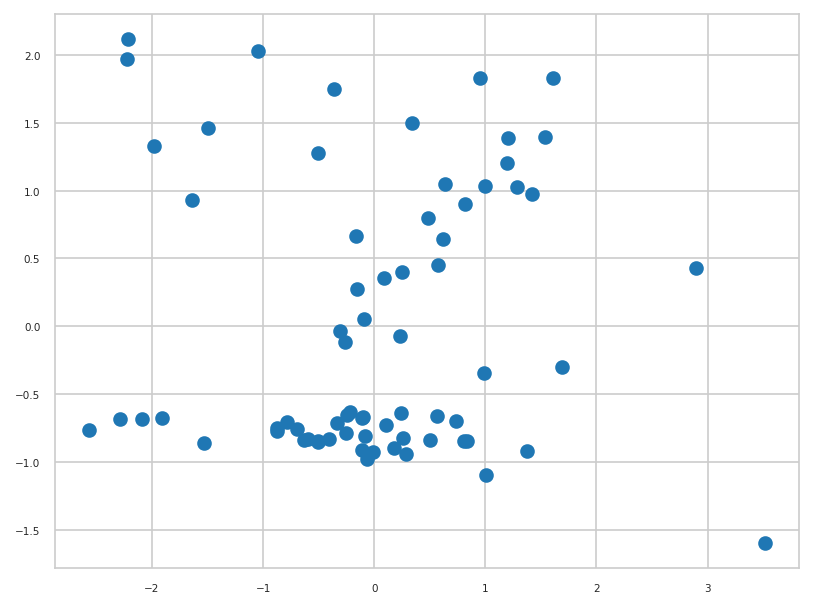

In [76]:
plt.scatter(x[:,0],x[:,1])

In [77]:
sum(pca.explained_variance_ratio_)

0.7841897164104739

In [78]:
pca.components_

array([[ 0.69600011,  0.1106562 , -0.70946392],
       [-0.19621873,  0.97975693, -0.03968077]])

In [79]:
from sklearn.cluster import KMeans

In [1]:
template_metrics

NameError: name 'template_metrics' is not defined

In [80]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(template_metrics)

kmeans2 = KMeans(n_clusters=2, random_state=0).fit(x)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [81]:
kmeans.labels_


NameError: name 'kmeans' is not defined

In [82]:
kmeans2.labels_

NameError: name 'kmeans2' is not defined

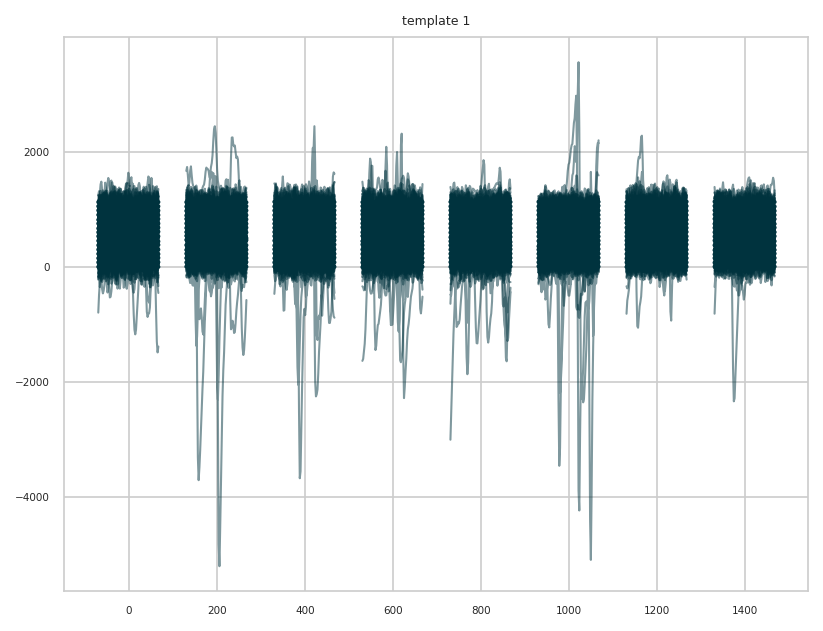

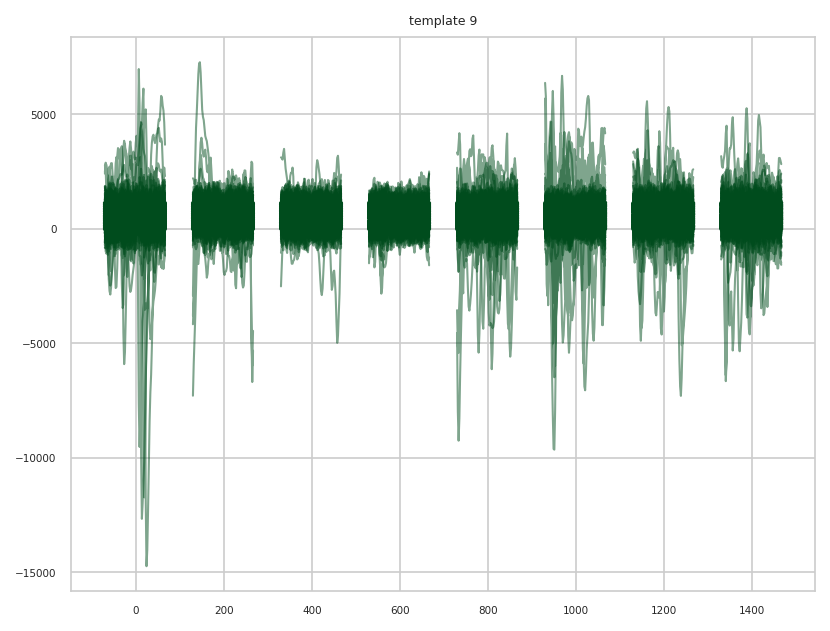

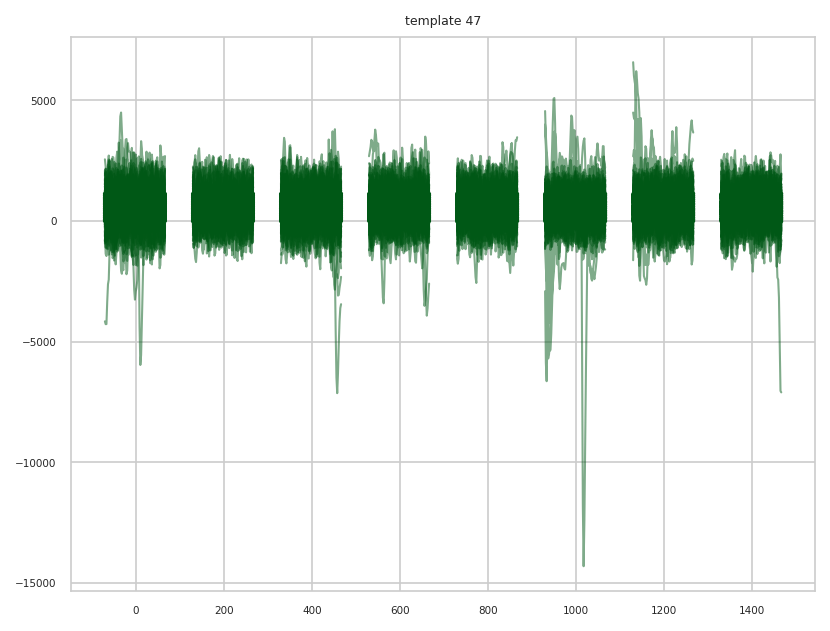

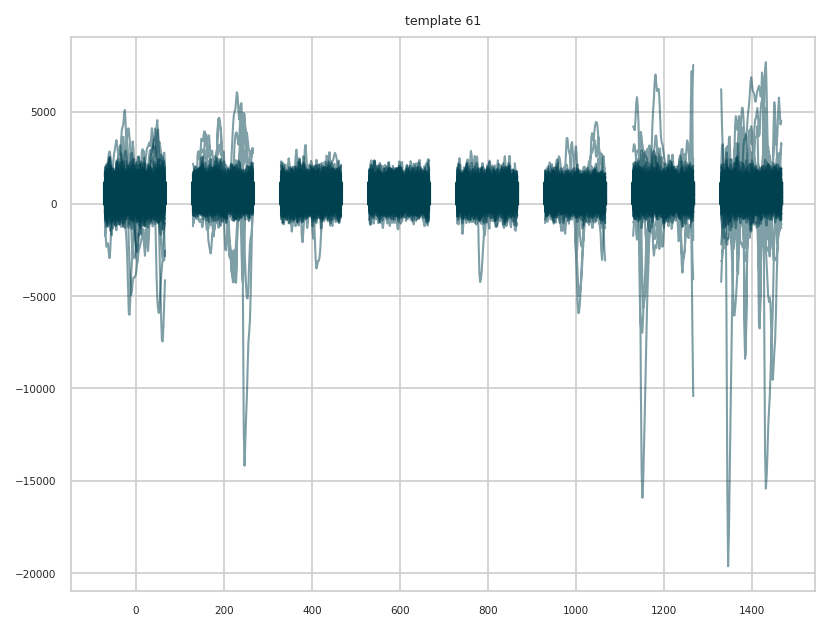

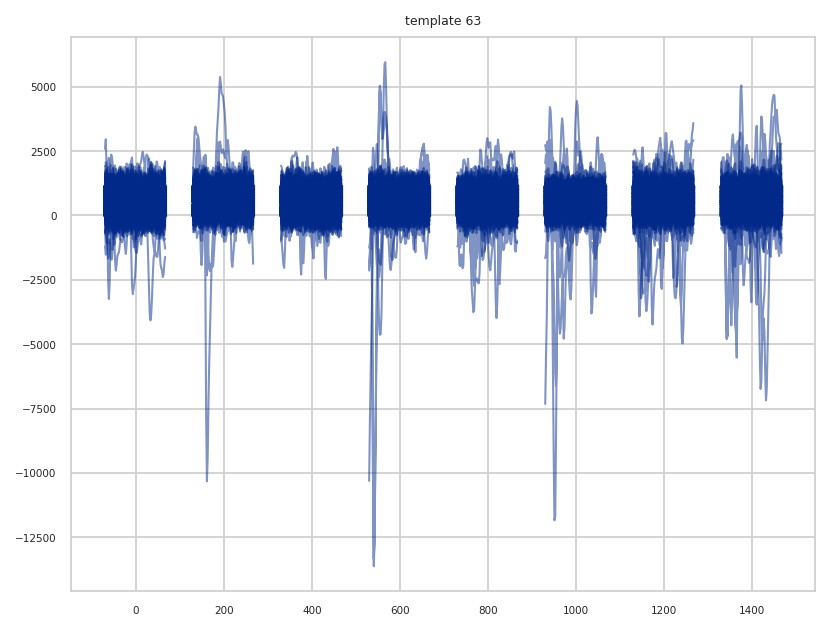

In [83]:
for i in agreement_sorting.get_unit_ids()[:5]:
    sw.plot_unit_waveforms(we_consensus, unit_ids=[i])
    plt.show()

In [84]:
dir(agreement_sorting)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_check_segment_index',
 '_extra_metadata_from_folder',
 '_extra_metadata_to_folder',
 '_features',
 '_get_file_path',
 '_kwargs',
 '_main_annotations',
 '_main_features',
 '_main_ids',
 '_main_properties',
 '_preferred_mp_context',
 '_properties',
 '_recording',
 '_sampling_frequency',
 '_save',
 '_sorting_segments',
 'add_sorting_segment',
 'annotate',
 'check_if_dumpable',
 'clone',
 'copy_metadata',
 'default_missing_property_values',
 'delete_property',
 'dump',
 'dump_to_json',
 'dump_to_pickle',
 'extra_requirements',
 'extractor_name',
 'frame_slice',
 'from_dict',
 'get_all_spike_trains',
 'get_a

In [85]:
we_ks3 = WaveformExtractor.load_from_folder(out + 'kilosort3' + '_wfs_test')

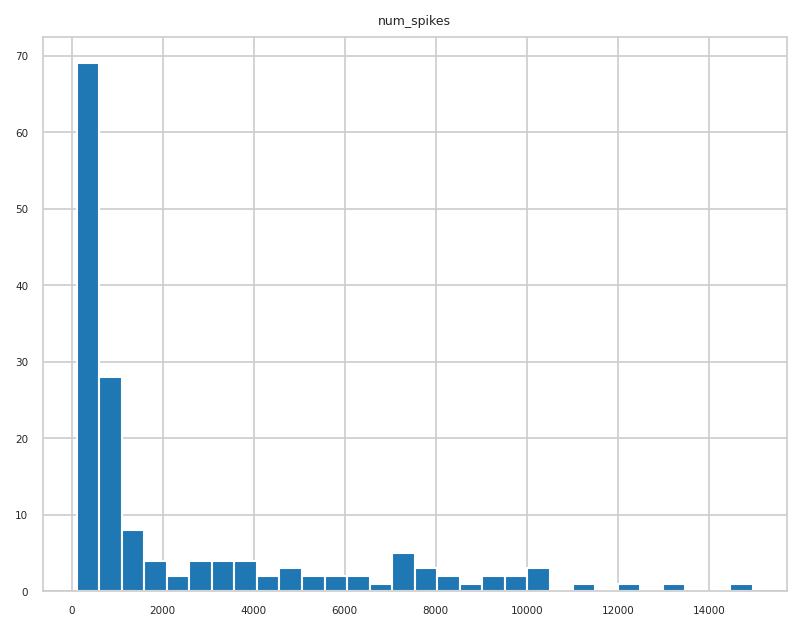

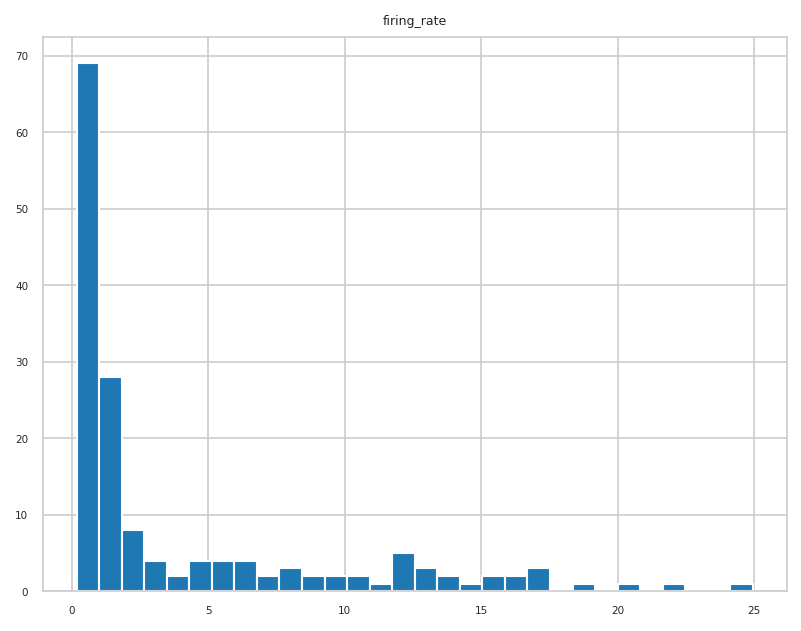

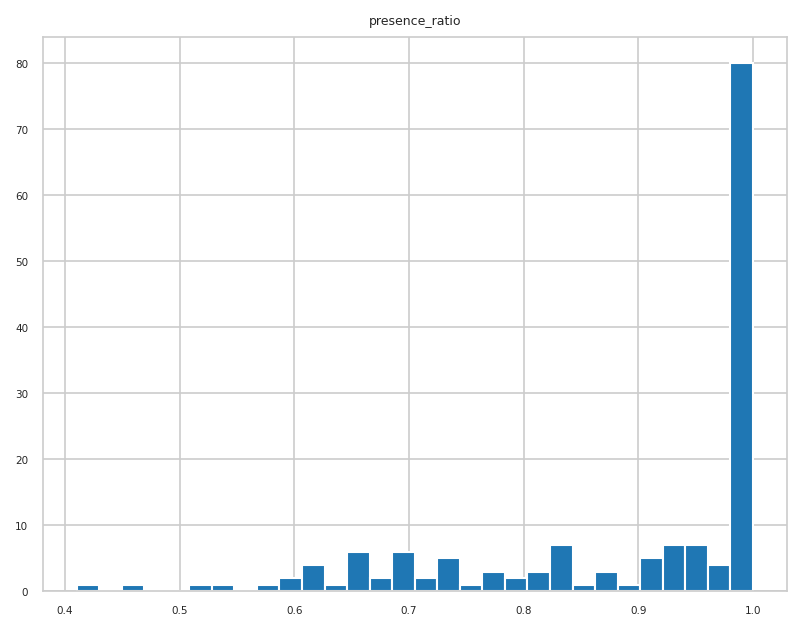

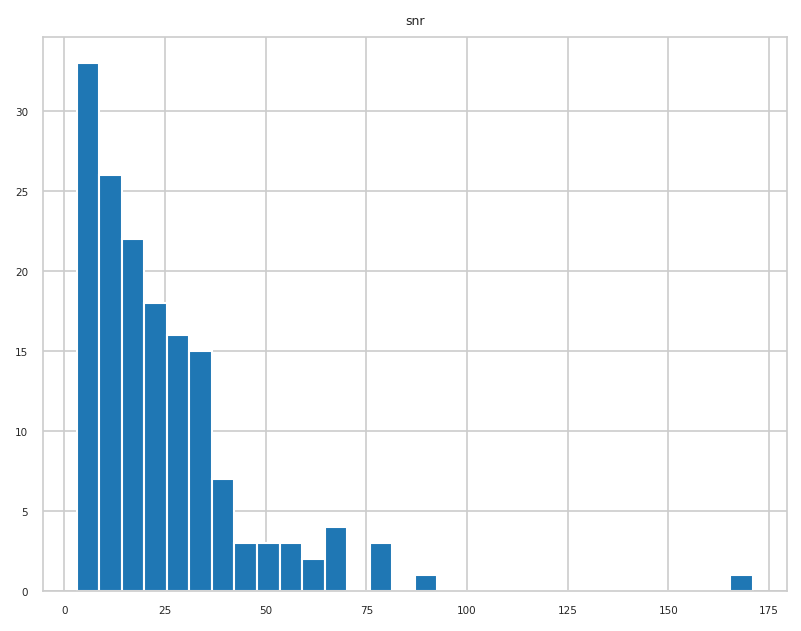

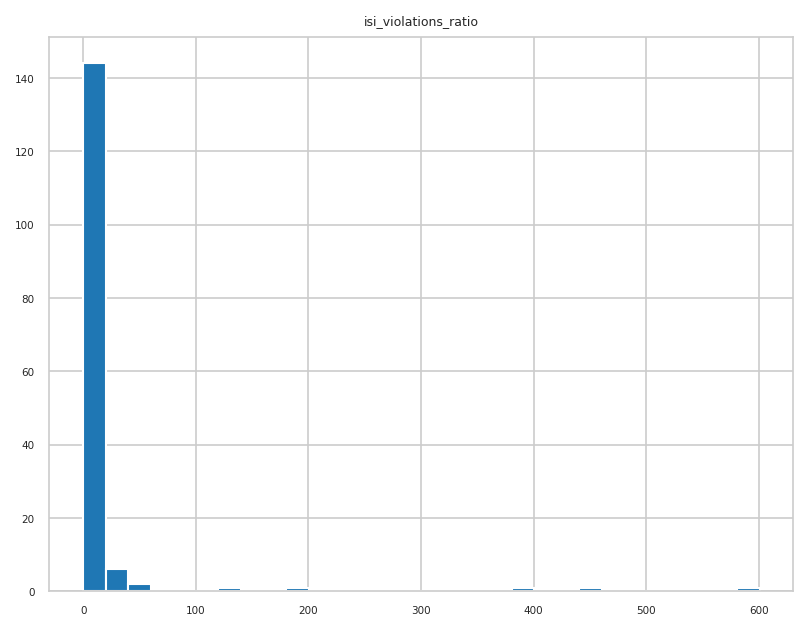

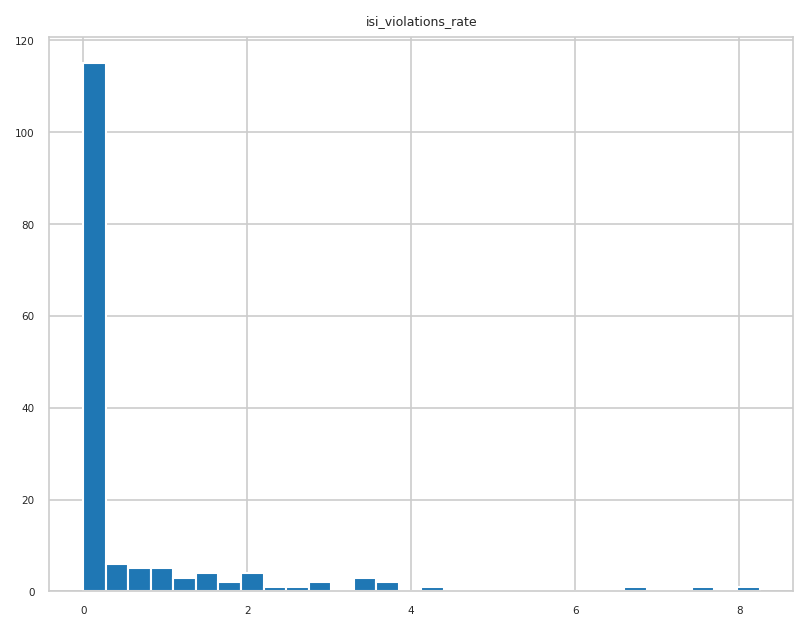

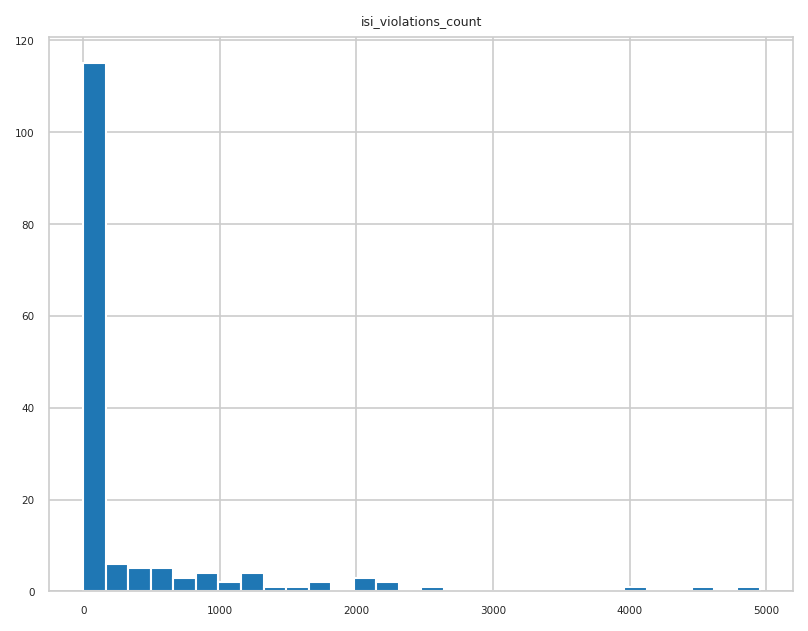

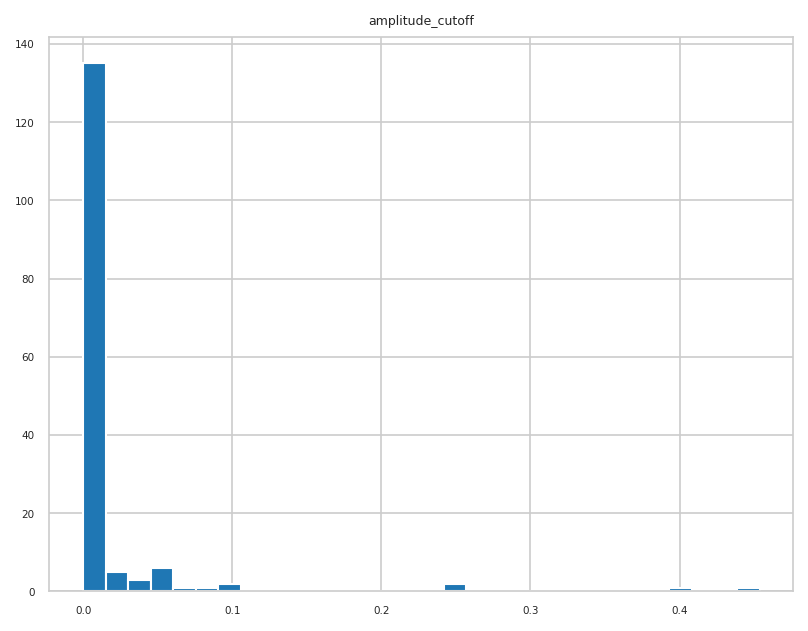

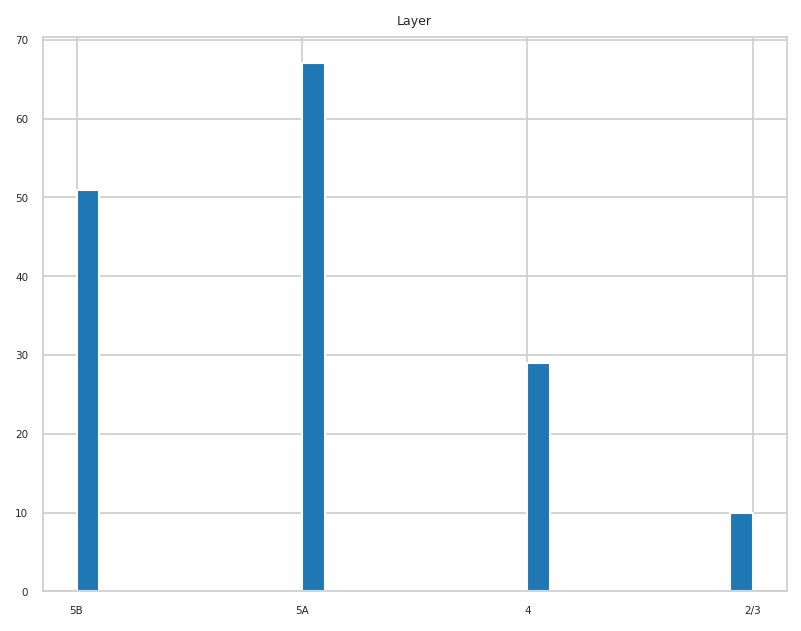

In [86]:
for col in qmetrics['kilosort3'].columns:
    qmetrics['kilosort3'][col].hist( bins = 30)
    plt.title(col)
    plt.show()

In [87]:
template_metrics_ks3 = spost.compute_template_metrics(we_ks3)

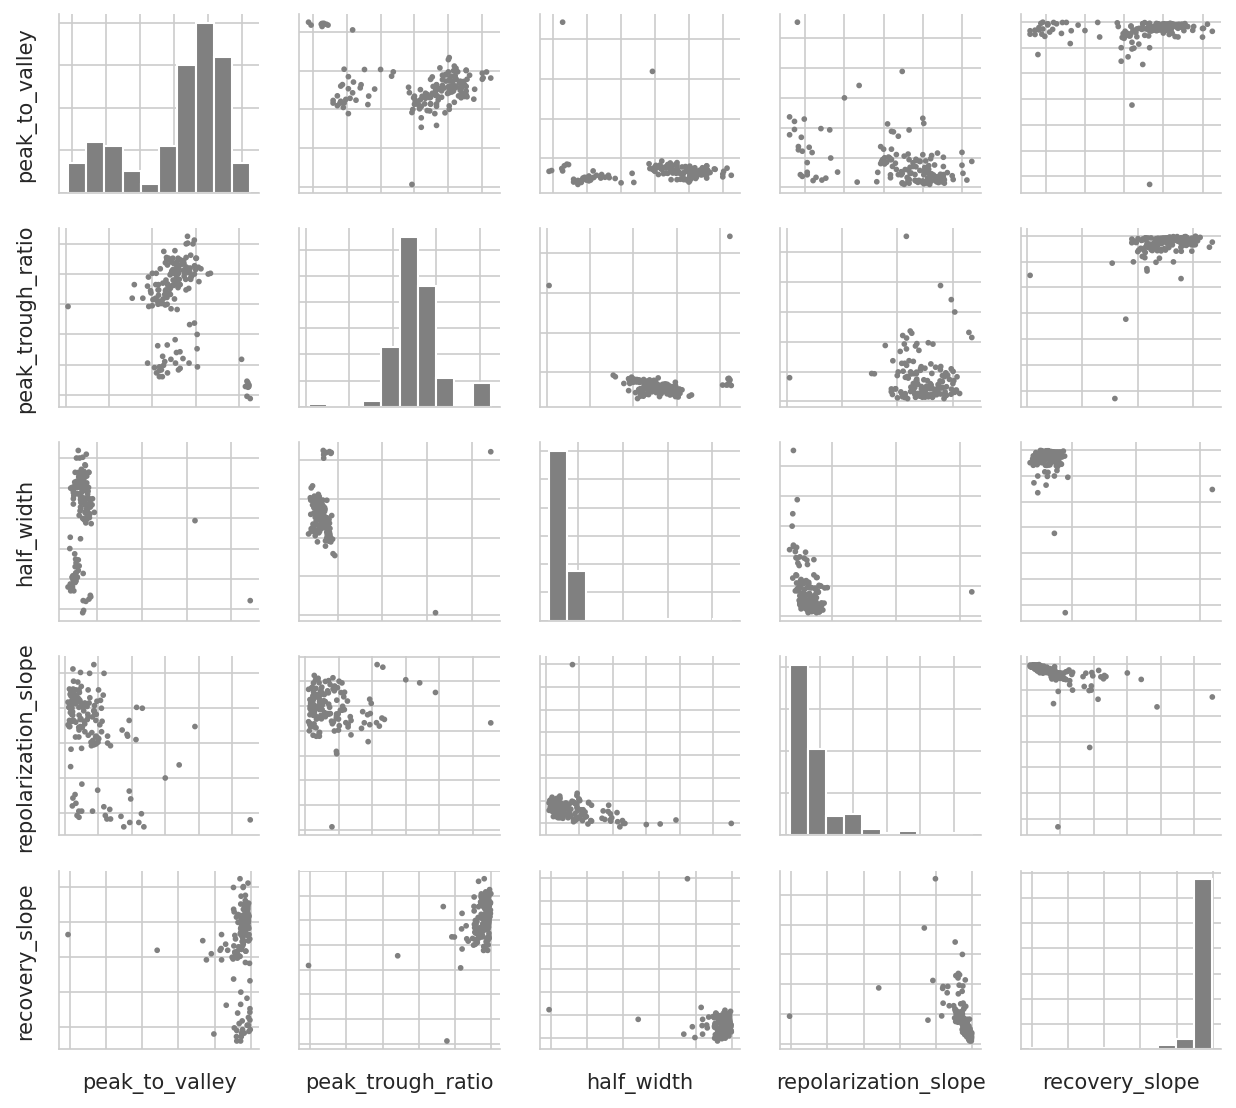

In [88]:
sw.plot_template_metrics(we_ks3, include_metrics=["peak_to_valley", "half_width", "peak_trough_ratio", "repolarization_slope", "recovery_slope"])

In [89]:
kmeans = KMeans(n_clusters=2, random_state=1).fit(template_metrics_ks3[['peak_to_valley', 'peak_trough_ratio']])
labels = kmeans.labels_

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7ff1247a0f70>
Traceback (most recent call last):
  File "/gpfs/bbp.cscs.ch/project/proj68/home/laquitaine/spike-sorting/env/lib/python3.9/site-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/gpfs/bbp.cscs.ch/project/proj68/home/laquitaine/spike-sorting/env/lib/python3.9/site-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/gpfs/bbp.cscs.ch/project/proj68/home/laquitaine/spike-sorting/env/lib/python3.9/site-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/gpfs/bbp.cscs.ch/project/proj68/home/laquitaine/spike-sorting/env/lib/python3.9/site-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  F

<AxesSubplot: xlabel='peak_to_valley', ylabel='peak_trough_ratio'>

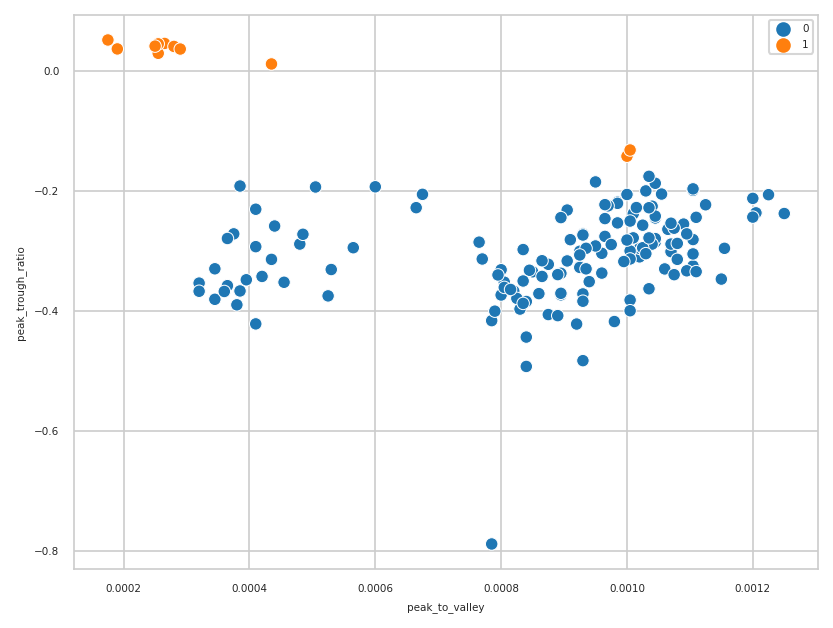

In [90]:
sns.scatterplot(data = template_metrics_ks3, x = 'peak_to_valley', y = 'peak_trough_ratio', hue = labels)

In [92]:
GaussianMixture(
        n_components=n_classes, covariance_type=cov_type, max_iter=20, random_state=0
    ) for cov_type in ["spherical", "diag", "tied", "full"]

SyntaxError: invalid syntax (2299580414.py, line 3)